In [22]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
print(os.getcwd())

c:\Users\dianam\Documents\jlab_datascience\PlayGround\DS6050\eICU_gan\gan_work


In [24]:
conn_eICU = sqlite3.connect('../data/sqlite_eicu_v2_0_1.sqlite3')

In [25]:
#### Helpful functions
def emptyColumnCounts(df):
    """
    print out the column name and the number of rows with empty string values
    """
    for col in df.columns[0:29]:
        try:
            print(col, ': ', df.isin(['']).groupby([col]).count().iloc[1,1])
        except:
            print(col,': 0')

### Display the table names

In [26]:
sql = """SELECT name FROM sqlite_schema WHERE type='table' ORDER BY name;"""
 
data_tables = pd.read_sql(sql, conn_eICU)
data_tables


,name
0,admissiondrug
1,admissiondx
2,allergy
3,apacheapsvar
4,apachepatientresult
5,apachepredvar
6,careplancareprovider
7,careplaneol
8,careplangeneral
9,careplangoal


### Pasthistory

In [197]:
sql = """SELECT * FROM pasthistory"""
 
data_hist = pd.read_sql(sql, conn_eICU)
print(data_hist.shape)

#data_hist_yes_hist = data_hist[~data_hist['pasthistoryvaluetext'].isin(['NoHealthProblems','Performed','other'])]
#print(data_hist_yes_hist.shape)
#print("pasthistorynotetype: ", data_hist.pasthistorynotetype.unique(), " - Count: ", len(data_hist.pasthistorynotetype.unique()))
#print("patientunitstayid: ", data_hist.patientunitstayid.unique(), " - Count: ", len(data_hist.patientunitstayid.unique()))
#print("pasthistoryvalue: ", data_hist.pasthistoryvalue.unique(), " - Count: ", len(data_hist.pasthistoryvalue.unique()))
#print("pasthistoryvaluetext: ", data_hist.pasthistoryvaluetext.unique(), " - Count: ", len(data_hist.pasthistoryvaluetext.unique()))
data_hist.query('pasthistoryvaluetext != "NoHealthProblems"').head()

(12109, 8)


,pasthistoryid,patientunitstayid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvalue,pasthistoryvaluetext
5,1261966,147784,10,20,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,Performed,Performed
6,1261967,147784,10,20,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,medication dependent,medication dependent
9,1137517,151179,18,29,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,Performed,Performed
10,1137518,151179,18,29,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,lung,lung
11,1137519,151179,18,29,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,other,other


Need to get only the "No Health Problems" with patient unit stay so I can append them to the dataframe with the "real" past histories.


In [198]:
lst_top10hist = data_hist.groupby('pasthistoryvalue').count().sort_values(['pasthistoryid'], ascending=False).head(10).index.to_list()
lst_bottom10hist = data_hist.groupby('pasthistoryvalue').count().sort_values(['pasthistoryid'], ascending=False)[50:60].index.to_list()
print("Top History:")
print(lst_top10hist)
print("Bottom History:")
print(lst_bottom10hist)

lst_hist = np.append(lst_top10hist, lst_bottom10hist)

print("Top 10 + 100th - 110th most common History:")
print(lst_hist)

Top History:
['Performed', 'hypertension requiring treatment', 'insulin dependent diabetes', 'medication dependent', 'CHF', 'atrial fibrillation - chronic', 'COPD  - moderate', 'hypothyroidism', 'No Health Problems', 'asthma']
Bottom History:
['MR', 'Not Obtainable', 'restrictive pulmonary disease', 'renal insufficiency - creatinine 2-3', 'head and neck', 'neuromuscular disease', 'MI - within 6 months', 'ascites', 'primary site', 's/p AVR']
Top 10 + 100th - 110th most common History:
['Performed' 'hypertension requiring treatment'
 'insulin dependent diabetes' 'medication dependent' 'CHF'
 'atrial fibrillation - chronic' 'COPD  - moderate' 'hypothyroidism'
 'No Health Problems' 'asthma' 'MR' 'Not Obtainable'
 'restrictive pulmonary disease' 'renal insufficiency - creatinine 2-3'
 'head and neck' 'neuromuscular disease' 'MI - within 6 months' 'ascites'
 'primary site' 's/p AVR']


In [199]:
#data_hist_filter = data_hist.query('pasthistoryvaluetext != "NoHealthProblems"')
data_hist_filter = data_hist.query('pasthistoryvaluetext != "Performed"')

lst_top10hist_filtered = data_hist_filter.groupby('pasthistoryvalue').count().sort_values(['pasthistoryid'], ascending=False).head(10).index.to_list()
print("Top History: ", lst_top10hist_filtered)

data_hist_top = data_hist_filter.loc[data_hist_filter['pasthistoryvalue'].isin(lst_top10hist_filtered)]
print(data_hist_top.shape)
data_hist_top.head()

Top History:  ['hypertension requiring treatment', 'insulin dependent diabetes', 'medication dependent', 'CHF', 'atrial fibrillation - chronic', 'COPD  - moderate', 'hypothyroidism', 'No Health Problems', 'asthma', 'MI - date unknown']
(4481, 8)


,pasthistoryid,patientunitstayid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvalue,pasthistoryvaluetext
0,990803,141765,7,12,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
1,970059,143870,4,10,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
2,1180401,144815,32,41,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
3,1194998,145427,8,13,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
4,896652,147307,53,56,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems


In [200]:
data_hist_filter.groupby(['pasthistoryvalue']).count().sort_values(['pasthistoryvalue'], ascending=True)

,pasthistoryid,patientunitstayid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvaluetext
pasthistoryvalue,,,,,,,
>= 20 mg prednisone per day or equivalent,8,8,8,8,8,8,8
A paced,6,6,6,6,6,6,6
A/V paced,17,17,17,17,17,17,17
AICD,51,51,51,51,51,51,51
ALL,1,1,1,1,1,1,1
AML,4,4,4,4,4,4,4
AR,9,9,9,9,9,9,9
AS,56,56,56,56,56,56,56
"Alkylating agents (bleomycin, cytoxan, cyclophos.)",1,1,1,1,1,1,1


In [31]:
data_hist_top.groupby('pasthistoryvalue').count().sort_values(['pasthistoryid'], ascending=False)

,pasthistoryid,patientunitstayid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvaluetext
pasthistoryvalue,,,,,,,
hypertension requiring treatment,1746,1746,1746,1746,1746,1746,1746
insulin dependent diabetes,457,457,457,457,457,457,457
medication dependent,397,397,397,397,397,397,397
CHF,392,392,392,392,392,392,392
atrial fibrillation - chronic,292,292,292,292,292,292,292
COPD - moderate,276,276,276,276,276,276,276
hypothyroidism,273,273,273,273,273,273,273
asthma,205,205,205,205,205,205,205
MI - date unknown,204,204,204,204,204,204,204


In [201]:
data_hist_top.groupby('patientunitstayid').count().sort_values(['pasthistoryid'], ascending=False).shape

(1756, 7)

#### data_hist_top has 7565 patient unit stays for 1756 patients. Need to join to the patients table and see whether I have diverse ethnicities, ages, and unit types

In [202]:
data_hist_topbottom = data_hist.loc[data_hist['pasthistoryvalue'].isin(lst_hist)]
print(data_hist_topbottom.shape)
data_hist_topbottom.head()

(7565, 8)


,pasthistoryid,patientunitstayid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvalue,pasthistoryvaluetext
0,990803,141765,7,12,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
1,970059,143870,4,10,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
2,1180401,144815,32,41,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
3,1194998,145427,8,13,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
4,896652,147307,53,56,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems


In [203]:
data_hist.query('patientunitstayid == 145427')

,pasthistoryid,patientunitstayid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvalue,pasthistoryvaluetext
3,1194998,145427,8,13,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems


In [204]:
print("pasthistoryvalue: ", data_hist.pasthistoryvalue.unique(), " - Count: ", len(data_hist.pasthistoryvalue.unique()))

pasthistoryvalue:  ['No Health Problems' 'Performed' 'medication dependent' 'lung' 'other'
 'chemotherapy within past mo.' 'COPD  - no limitations' 'head and neck'
 'primary site' 'CABG - remote' 'atrial fibrillation - chronic'
 'hypertension requiring treatment' 'AICD' 'CHF - severity unknown' 'AR'
 'peripheral vascular disease' 'MI - date unknown' 'home oxygen'
 'stroke - date unknown' 'COPD  - severe' 'insulin dependent diabetes'
 'prostate' 'Hodgkins disease' 'asthma' 'CHF'
 '>= 20 mg prednisone per day or equivalent' 'angina'
 'renal failure- not currently dialyzed'
 'renal insufficiency - creatinine 1-2'
 'atrial fibrillation - intermittent' 'non-medication dependent' 'testes'
 'COPD  - moderate' 'other immunosuppressive medications' 'MI - remote'
 'CHF - class IV' 'recent steroid use for > 10 days' 'hypothyroidism'
 'unknown' 'peptic ulcer disease' 'renal failure - hemodialysis'
 'TIA(s) - date unknown' 'multiple myeloma' 'focal seizures'
 'angina - severity unknown'
 'procedura

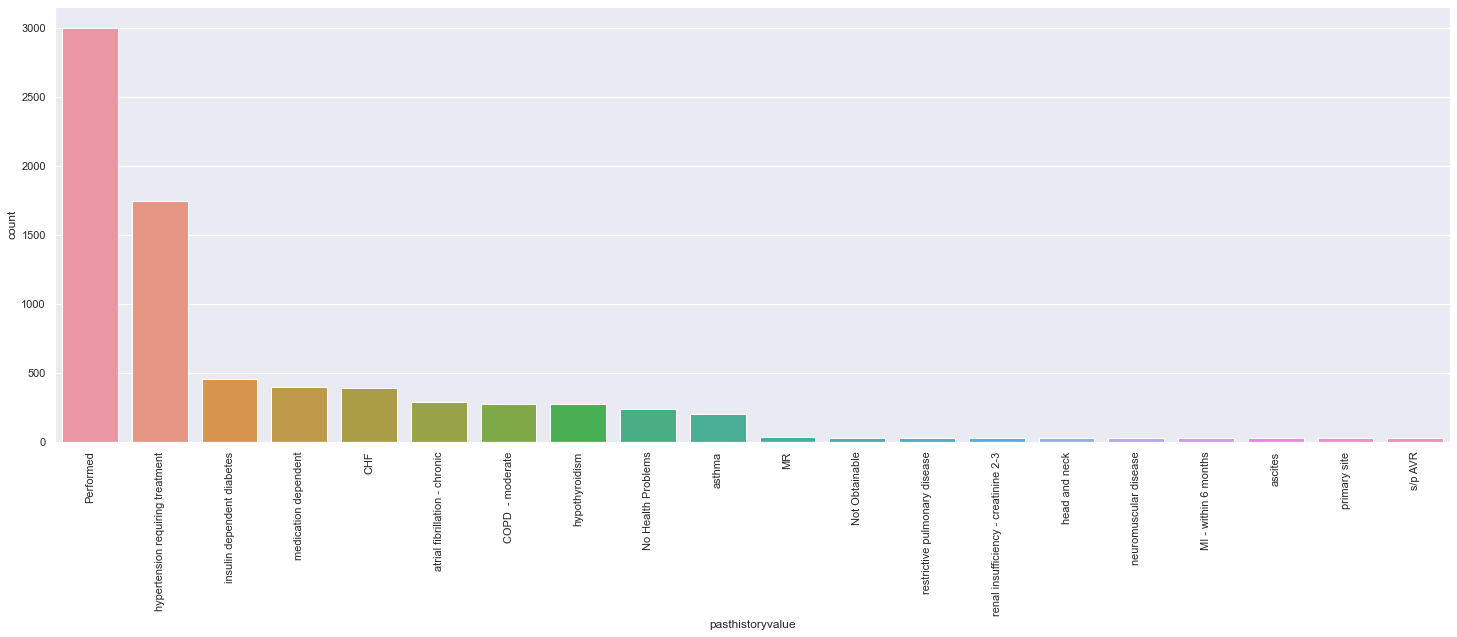

In [205]:
fig, axes = plt.subplots(1, 1, figsize=(25, 8))

sns.countplot(data=data_hist_topbottom, x="pasthistoryvalue", order = data_hist_topbottom['pasthistoryvalue'].value_counts().index)
plt.tick_params(axis="x", labelrotation=90)

Right now we have 7565 past history records for 2191 patient unit stays:
* these have the 10 most frequent and 50th-59th most frequent past history values


Next, create a one-hot encoded version of the pasthistoryvalues with the patient unit stay id as the grouping. We can then append these to the patient table.

In [37]:
# create a one hot encoded with patientunitstayid and pasthistoryvalue
df_hist_simple = data_hist_topbottom[['patientunitstayid','pasthistoryvalue']]
ohe_hist = pd.get_dummies(df_hist_simple['pasthistoryvalue'])
#print(ohe_hist[100:102])

# join the one hot encoded to the dataframe with only two columns
df_hist_tojoin = pd.merge(
    left=df_hist_simple,
    right=ohe_hist,
    left_index=True,
    right_index=True,
)

# drop any rows with duplicates, because with one hot encoding we don't care if a past history value happened twice during a unit stay
df_hist_tojoin = df_hist_tojoin.drop_duplicates(subset=['patientunitstayid','pasthistoryvalue'])

# create a sum grouping so that we have a single record for each unit stay with all the one hot encoded values
df_hist_tojoin_grp = df_hist_tojoin.drop(['pasthistoryvalue'], axis=1).groupby('patientunitstayid').sum()

# flatten the grouping
df_hist_tojoin_grp = df_hist_tojoin_grp.reset_index()

print(df_hist_tojoin_grp.shape)
df_hist_tojoin_grp.tail()

(2191, 21)


,patientunitstayid,CHF,COPD - moderate,MI - within 6 months,MR,No Health Problems,Not Obtainable,Performed,ascites,asthma,atrial fibrillation - chronic,head and neck,hypertension requiring treatment,hypothyroidism,insulin dependent diabetes,medication dependent,neuromuscular disease,primary site,renal insufficiency - creatinine 2-3,restrictive pulmonary disease,s/p AVR
2186,3351763,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2187,3352230,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2188,3352231,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2189,3352333,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2190,3353113,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### Diagnosis

There are only 2155 unique patientunitstayid's in the diagnosis table but 2520 patient rows, and 1841 unique patients. In other words:
* 1841 unique patients
* 2520 unit stays
* 2155 unique patient diagnosis

So, there are **365 patient unit stays with no diagnosis row.**

In [38]:
sql = """SELECT * FROM diagnosis"""
 
data_diag = pd.read_sql(sql, conn_eICU)
print(data_diag.shape)
print("patientunitstayid: ", data_diag.patientunitstayid.unique(), " - Count: ", len(data_diag.patientunitstayid.unique()))
data_diag.head()

(24978, 7)
patientunitstayid:  [ 346380  369273  498848 ... 3139532 3158501 3173599]  - Count:  2155


,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
0,7607199,346380,False,5028,cardiovascular|ventricular disorders|hypertension,"401.9, I10",Other
1,7570429,346380,False,685,neurologic|altered mental status / pain|change...,"780.09, R41.82",Major
2,7705483,346380,True,5035,cardiovascular|shock / hypotension|hypotension,"458.9, I95.9",Major
3,7848601,346380,True,5035,neurologic|altered mental status / pain|schizo...,"295.90, F20.9",Major
4,7451475,346380,False,5028,pulmonary|disorders of vasculature|pulmonary e...,"415.19, I26.99",Major


### AdmissionDx

In [39]:
sql = """SELECT * FROM admissiondx"""
 
data_admitDx = pd.read_sql(sql, conn_eICU)
print(data_admitDx.shape)

data_admitDx['admitdxpath_clean'] = [p.replace('admission diagnosis|', '') for p in data_admitDx['admitdxpath']]
#print("admitdxpath_clean: ", data_admitDx.admitdxpath_clean.unique(), " - Count: ", len(data_admitDx.admitdxpath_clean.unique()))
#data_admitDx.head()
data_admitDx.groupby(['patientunitstayid']).count().sort_values(['admitdxpath_clean'], ascending=False).head()

(7578, 6)


,admissiondxid,admitdxenteredoffset,admitdxpath,admitdxname,admitdxtext,admitdxpath_clean
patientunitstayid,,,,,,
838945,10,10,10,10,10,10
531662,10,10,10,10,10,10
2501548,10,10,10,10,10,10
1576578,10,10,10,10,10,10
706954,10,10,10,10,10,10


### Treatment

### Medication

### Lab

### Hospital Table

In [40]:
sql = """SELECT hospitalid as h_id, numbedscategory as nbc, teachingstatus, region FROM hospital"""
 
data_hosp = pd.read_sql(sql, conn_eICU)
print(data_hosp.shape)
#data_hosp.head()
#data_hosp.groupby(['region','nbc']).count()

(186, 4)


In [41]:
print("nbc: ", data_hosp.nbc.unique(), " - Count: ", len(data_hosp.nbc.unique()))
print("region: ", data_hosp.region.unique(), " - Count: ", len(data_hosp.region.unique()))

nbc:  ['<100' '100 - 249' '' '>= 500' '250 - 499']  - Count:  5
region:  ['Midwest' '' 'South' 'West' 'Northeast']  - Count:  5


In [42]:
df_hosp_empties = data_hosp.query("nbc == ''")
#df_hosp_empties

In [43]:
print("===" * 30)
print("Hospital Empty Rows Per Column")
emptyColumnCounts(data_hosp)

Hospital Empty Rows Per Column
h_id : 0
nbc :  28
teachingstatus : 0
region :  18


In [44]:
sql = """SELECT * FROM patient"""
data_patients = pd.read_sql(sql, conn_eICU)
data_patients.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141764,129391,Female,87,Caucasian,59,91,,157.5,23:36:00,-2258,,2015,19:20:00,366,Home,Alive,Med-Surg ICU,13:14:00,ICU to SDU,2,stepdown/other,,,18:58:00,344,Home,Alive,002-1039
1,141765,129391,Female,87,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",157.5,23:36:00,-8,,2015,19:20:00,2616,Home,Alive,Med-Surg ICU,23:44:00,Emergency Department,1,admit,46.5,45,13:14:00,2250,Step-Down Unit (SDU),Alive,002-1039
2,143870,131022,Male,76,Caucasian,68,103,"Endarterectomy, carotid",167,20:46:00,-1,Operating Room,2014,17:05:00,1218,Home,Alive,SICU,20:47:00,Operating Room,1,admit,77.5,79.4,10:00:00,793,Floor,Alive,002-12289
3,144815,131736,Female,34,Caucasian,56,82,"Overdose, other toxin, poison or drug",172.7,01:44:00,-23,Emergency Department,2015,21:05:00,1138,Other Hospital,Alive,Med-Surg ICU,02:07:00,Emergency Department,1,admit,60.3,60.7,20:48:00,1121,Other External,Alive,002-1116
4,145427,132209,Male,61,Caucasian,68,103,"GI perforation/rupture, surgery for",177.8,23:48:00,-10,Emergency Department,2014,15:41:00,5263,Home,Alive,SICU,23:58:00,Operating Room,1,admit,91.7,93.1,22:47:00,1369,Floor,Alive,002-12243


In [45]:
data_patients.sort_values(['unitvisitnumber'], ascending=False).head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
104,197617,172762,Female,69,Caucasian,63,95,"ARDS-adult respiratory distress syndrome, non-...",160,00:10:00,-5645,Operating Room,2014,00:10:00,14515,Home,Alive,Med-Surg ICU,22:15:00,Step-Down Unit (SDU),5,readmit,57.1,53.8,19:39:00,7044,Floor,Alive,002-10148
1588,2167319,1717136,Male,70,Caucasian,310,836,Pancreatitis,182.9,07:53:00,-13714,,2014,17:29:00,9902,Home,Alive,Med-Surg ICU,20:27:00,ICU,5,stepdown/other,77.2,64.86,00:40:00,4573,Acute Care/Floor,Alive,021-102422
1606,2220763,1758666,Male,62,Caucasian,310,836,Alcohol withdrawal,188,16:28:00,-4507,,2015,22:28:00,173,Other External,Alive,Med-Surg ICU,19:35:00,ICU,5,stepdown/other,105.2,,22:28:00,173,Other External,Alive,021-10111
1558,2085134,1653356,Male,56,Caucasian,310,836,"Obstruction-airway (i.e., acute epiglottitis, ...",170.2,05:14:28,-19444,,2014,20:00:00,3042,Home,Alive,Med-Surg ICU,17:18:00,ICU to SDU,4,stepdown/other,56.2,,20:00:00,3042,Home,Alive,021-100823
683,851093,641182,Male,64,Caucasian,154,394,"Obstruction-airway (i.e., acute epiglottitis, ...",169,01:33:00,-1439,,2015,22:55:00,7043,Home,Alive,Med-Surg ICU,01:32:00,ICU,4,transfer,93.8,,20:53:00,1161,Acute Care/Floor,Alive,006-100602


In [46]:
data_patients.query('uniquepid == "006-100602"')

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
567,664474,529234,Male,64,Caucasian,148,347,"Obstruction-airway (i.e., acute epiglottitis, ...",169,21:35:00,-150,Emergency Department,2015,02:42:00,1597,Other External,Alive,MICU,00:05:00,Emergency Department,1,admit,101.4,93.8,02:42:00,1597,Other External,Alive,006-100602
683,851093,641182,Male,64,Caucasian,154,394,"Obstruction-airway (i.e., acute epiglottitis, ...",169,01:33:00,-1439,,2015,22:55:00,7043,Home,Alive,Med-Surg ICU,01:32:00,ICU,4,transfer,93.8,,20:53:00,1161,Acute Care/Floor,Alive,006-100602
684,851094,641182,Male,64,Caucasian,154,317,"Obstruction-airway (i.e., acute epiglottitis, ...",169,01:33:00,-8,,2015,22:55:00,8474,Home,Alive,Med-Surg ICU,01:41:00,Emergency Department,1,admit,93.8,95.1,01:17:00,1416,ICU,Alive,006-100602
685,851095,641182,Male,64,Caucasian,154,317,,169,01:33:00,-1436,,2015,22:55:00,7046,Home,Alive,Med-Surg ICU,01:29:00,ICU,3,transfer,93.8,,01:32:00,3,ICU,Alive,006-100602
686,851096,641182,Male,64,Caucasian,154,394,,169,01:33:00,-1424,,2015,22:55:00,7058,Home,Alive,Med-Surg ICU,01:17:00,ICU,2,transfer,93.8,,01:29:00,12,ICU,Alive,006-100602


In [47]:
print("unitdischargestatus: ", data_patients.unitdischargestatus.unique(), " - Count: ", len(data_patients.unitdischargestatus.unique()))
print("===" * 30)
df_Expired = data_patients.query('unitdischargestatus == "Expired"')
print('Discharge == Expired: ',df_Expired.shape)
df_Expired.sort_values(['unitvisitnumber'], ascending=False).head()

unitdischargestatus:  ['Alive' 'Expired' '']  - Count:  3
Discharge == Expired:  (126, 29)


,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
1682,2432352,1931156,Female,80,Caucasian,345,876,Coma/change in level of consciousness (for hep...,152.4,06:23:00,-14023,,2014,11:40:00,2134,Death,Expired,Med-Surg ICU,00:06:00,Acute Care/Floor,4,transfer,68.5,,11:40:00,2134,Death,Expired,022-100517
2174,2982293,2416912,Female,82,Caucasian,412,1016,Coma/change in level of consciousness (for hep...,152,17:11:00,-1964,Emergency Department,2014,13:30:00,5015,Death,Expired,MICU,01:55:00,Step-Down Unit (SDU),3,readmit,61,59.1,13:33:00,5018,Death,Expired,028-10678
1613,2233403,1768472,Male,83,Caucasian,310,836,"Bleeding, upper GI",167.6,08:02:00,-834,,2014,09:00:00,664,Death,Expired,Med-Surg ICU,21:56:00,Step-Down Unit (SDU),3,admit,82.4,,08:18:00,622,Death,Expired,021-101051
659,827085,626702,Female,78,Caucasian,157,369,"Hypovolemia (including dehydration, Do not inc...",162.6,00:09:00,-5307,,2014,03:30:00,3534,Death,Expired,Med-Surg ICU,16:36:00,Floor,3,readmit,74.4,76.2,03:30:00,3534,Death,Expired,006-10190
602,733083,570194,Female,68,Caucasian,171,377,Cardiac arrest (with or without respiratory ar...,154.9,12:15:00,-25864,Floor,2015,22:57:00,698,Death,Expired,Med-Surg ICU,11:19:00,Floor,3,readmit,70.6,,22:57:00,698,Death,Expired,006-100205


In [48]:
#df_Expired.groupby(['ethnicity','gender','unitvisitnumber']).count()

**The patient records are not reliable to have all the unit admits for each unique patient**

Good Example: 
* Patient with uniquepid 002-10148:
    * highest unitvisitnumber == 5
    * data_patients.query('uniquepid == "002-10148"').shape[0] == **5**
    * all unit visits are accounted for

Not Straight-forward Examples:
* Patient with uniquepi 021-102422:
    * highest unitvisitnumber == 5
    * data_patients.query('uniquepid == "021-102422"').shape[0] == 3
    * we are missing some unit visits
* Patient with uniquepi 006-100602:
    * highest unitvisitnumber == 4
    * data_patients.query('uniquepid == "006-100602"').shape[0] == 5
    * These were from 2 different admissions (can see the different patienthealthsystemstayid has 2 values: 529234 and 641182)

    

In [49]:
print('patient rows: ',data_patients.shape)
print('unique patients: ',data_patients.uniquepid.unique().shape)

patient rows:  (2520, 29)
unique patients:  (1841,)


In [50]:
print("===" * 30)
print("Patients Empty Rows Per Column")
emptyColumnCounts(data_patients)

Patients Empty Rows Per Column
patientunitstayid : 0
patienthealthsystemstayid : 0
gender :  4
age :  4
ethnicity :  39
hospitalid : 0
wardid : 0
apacheadmissiondx :  299
admissionheight :  69
hospitaladmittime24 : 0
hospitaladmitoffset : 0
hospitaladmitsource :  594
hospitaldischargeyear : 0
hospitaldischargetime24 : 0
hospitaldischargeoffset : 0
hospitaldischargelocation :  32
hospitaldischargestatus :  28
unittype : 0
unitadmittime24 : 0
unitadmitsource :  22
unitvisitnumber : 0
unitstaytype : 0
admissionweight :  198
dischargeweight :  1284
unitdischargetime24 : 0
unitdischargeoffset : 0
unitdischargelocation :  4
unitdischargestatus :  2
uniquepid : 0


### QUESTION: Do we want to include ambiguity in generated data?
    * Are we trying to generate data that is helpful to show data that typically is available for researchers?
        * it will be messing and will have empty and unknown values
    * Or are we trying to create clean data?
    * Or both? - that could be an interesting conditional.

* 4 empty gender - switch to Male?
* 4 empty age - replace with mode (89)
* age has a '> 89' value, so we will need to group the ages
    * look at the histogram for some ideas for grouping
* 39 empty ethnicity - replace with Other/Unknown
* 4 empty age - replace with 
* 299 empty apacheadmissiondx - leave
* 69 empty admissionheight - replace with mean for gender
* 594 empty hospitaladmitsource - replace with 'Unknown'
* 32 empty hospitaldischargelocation - replace with Unknown
* 28 empty hospitaldischargestatus - real values are 'Alive' or Expired' - not sure what to do
* 22 empty unitadmitsource - replace with 'Unknown'
* 198 empty admissionweight - replace with mean for gender
* 1284 empty dischargeweight - replace with admissionweight
* 4 empty unitdischargelocation - replace with 'Other'??
* 2 empty unitdischargestatus - real values are 'Alive' or Expired' - not sure what to do

In [51]:
# replace empty gender with Male (the most common gender category)
data_patients['gender'] = data_patients.gender.replace('','Male')
# fix age
data_patients['age'] = data_patients.age.replace('',90)
data_patients['age'] = data_patients.age.replace('> 89',90)
data_patients['age']=data_patients.age.astype('float32')
# create age buckets
age_bins = [0, 19, 20, 40, 60, 80, 90]
age_labels =['<20','20-39','40-59','60-79','80-89','90+']
data_patients['age_binned'] = pd.cut(data_patients['age'], age_bins,labels=age_labels)


# replace empty ethnicity
data_patients['ethnicity'] = data_patients.ethnicity.replace('','Other/Unknown')

# replace empty admissionheight

## Join the Past History One Hot Encoded Data
* joining the past history with 10 most frequent and 50th - 59th most frequent past history values to the patients table


In [52]:
data_patients = data_patients.set_index('patientunitstayid')
data_patients.head()

,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,age_binned
patientunitstayid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
141764,129391,Female,87.0,Caucasian,59,91,,157.5,23:36:00,-2258,,2015,19:20:00,366,Home,Alive,Med-Surg ICU,13:14:00,ICU to SDU,2,stepdown/other,,,18:58:00,344,Home,Alive,002-1039,90+
141765,129391,Female,87.0,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",157.5,23:36:00,-8,,2015,19:20:00,2616,Home,Alive,Med-Surg ICU,23:44:00,Emergency Department,1,admit,46.5,45,13:14:00,2250,Step-Down Unit (SDU),Alive,002-1039,90+
143870,131022,Male,76.0,Caucasian,68,103,"Endarterectomy, carotid",167,20:46:00,-1,Operating Room,2014,17:05:00,1218,Home,Alive,SICU,20:47:00,Operating Room,1,admit,77.5,79.4,10:00:00,793,Floor,Alive,002-12289,80-89
144815,131736,Female,34.0,Caucasian,56,82,"Overdose, other toxin, poison or drug",172.7,01:44:00,-23,Emergency Department,2015,21:05:00,1138,Other Hospital,Alive,Med-Surg ICU,02:07:00,Emergency Department,1,admit,60.3,60.7,20:48:00,1121,Other External,Alive,002-1116,40-59
145427,132209,Male,61.0,Caucasian,68,103,"GI perforation/rupture, surgery for",177.8,23:48:00,-10,Emergency Department,2014,15:41:00,5263,Home,Alive,SICU,23:58:00,Operating Room,1,admit,91.7,93.1,22:47:00,1369,Floor,Alive,002-12243,80-89


In [53]:
df_hist_tojoin_grp = df_hist_tojoin_grp.set_index('patientunitstayid')
df_hist_tojoin_grp.head()

,CHF,COPD - moderate,MI - within 6 months,MR,No Health Problems,Not Obtainable,Performed,ascites,asthma,atrial fibrillation - chronic,head and neck,hypertension requiring treatment,hypothyroidism,insulin dependent diabetes,medication dependent,neuromuscular disease,primary site,renal insufficiency - creatinine 2-3,restrictive pulmonary disease,s/p AVR
patientunitstayid,,,,,,,,,,,,,,,,,,,,
141765,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143870,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
144815,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145427,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
147307,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
data_join = data_patients.join(df_hist_tojoin_grp, how="outer")
data_join = data_join.replace(np.nan, 0)
# reset index to get patient unit stay id out of the index
data_join = data_join.reset_index()
data_join.head(5)

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,age_binned,CHF,COPD - moderate,MI - within 6 months,MR,No Health Problems,Not Obtainable,Performed,ascites,asthma,atrial fibrillation - chronic,head and neck,hypertension requiring treatment,hypothyroidism,insulin dependent diabetes,medication dependent,neuromuscular disease,primary site,renal insufficiency - creatinine 2-3,restrictive pulmonary disease,s/p AVR
0,141764,129391,Female,87.0,Caucasian,59,91,,157.5,23:36:00,-2258,,2015,19:20:00,366,Home,Alive,Med-Surg ICU,13:14:00,ICU to SDU,2,stepdown/other,,,18:58:00,344,Home,Alive,002-1039,90+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,141765,129391,Female,87.0,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",157.5,23:36:00,-8,,2015,19:20:00,2616,Home,Alive,Med-Surg ICU,23:44:00,Emergency Department,1,admit,46.5,45,13:14:00,2250,Step-Down Unit (SDU),Alive,002-1039,90+,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,143870,131022,Male,76.0,Caucasian,68,103,"Endarterectomy, carotid",167,20:46:00,-1,Operating Room,2014,17:05:00,1218,Home,Alive,SICU,20:47:00,Operating Room,1,admit,77.5,79.4,10:00:00,793,Floor,Alive,002-12289,80-89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,144815,131736,Female,34.0,Caucasian,56,82,"Overdose, other toxin, poison or drug",172.7,01:44:00,-23,Emergency Department,2015,21:05:00,1138,Other Hospital,Alive,Med-Surg ICU,02:07:00,Emergency Department,1,admit,60.3,60.7,20:48:00,1121,Other External,Alive,002-1116,40-59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,145427,132209,Male,61.0,Caucasian,68,103,"GI perforation/rupture, surgery for",177.8,23:48:00,-10,Emergency Department,2014,15:41:00,5263,Home,Alive,SICU,23:58:00,Operating Room,1,admit,91.7,93.1,22:47:00,1369,Floor,Alive,002-12243,80-89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create Some Plots

(array([ 12.,  42.,  44.,  55.,  48.,  81.,  90.,  49.,  78., 113., 177.,
        136., 190., 228., 226., 163., 256., 192., 141., 199.]),
 array([15.  , 18.75, 22.5 , 26.25, 30.  , 33.75, 37.5 , 41.25, 45.  ,
        48.75, 52.5 , 56.25, 60.  , 63.75, 67.5 , 71.25, 75.  , 78.75,
        82.5 , 86.25, 90.  ], dtype=float32),
 <BarContainer object of 20 artists>)

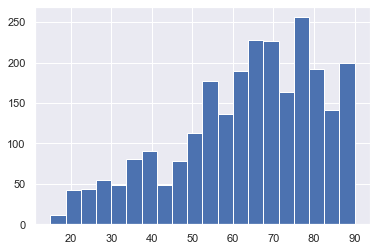

In [55]:
plt.hist(data_join['age'], bins=20)
#data_patients['age'].value_counts()

In [56]:
print(data_join.gender.unique())

['Female' 'Male']


In [57]:
print("gender: ", data_join.gender.unique(), " - Count: ", len(data_join.gender.unique()))
print("ethnicity: ", data_join.ethnicity.unique(), " - Count: ", len(data_join.ethnicity.unique()))
print("hospitals: ",data_join.hospitalid.unique(), " - Count: ", len(data_join.hospitalid.unique()))
print("hospital admit source: ", data_join.hospitaladmitsource.unique(), " - Count: ", len(data_join.hospitaladmitsource.unique()))
print("hospital discharge status: ", data_join.hospitaldischargestatus.unique(), " - Count: ", len(data_join.hospitaldischargestatus.unique()))

gender:  ['Female' 'Male']  - Count:  2
ethnicity:  ['Caucasian' 'Hispanic' 'Asian' 'African American' 'Other/Unknown'
 'Native American']  - Count:  6
hospitals:  [ 59  68  56  63  67  61  60  66  73  71  58  69 108  95  93  83  92  79
 123 133 110 131 112 115 120 125 122 138 141 142 140 143 144 175 176 179
 171 165 146 164 167 174 152 157 155 154 158 148 181 184 180 183 182 188
 194 196 195 197 198 201 205 206 199 200 204 203 202 210 208 209 207 215
 224 217 220 226 227 244 246 245 243 252 248 249 251 253 250 262 263 254
 264 258 256 259 266 267 269 282 272 279 275 268 281 280 283 271 273 277
 312 301 300 318 310 307 303 338 328 336 342 337 345 331 350 352 356 357
 365 358 363 364 360 353 355 390 404 389 405 388 382 387 407 408 398 393
 384 383 403 386 396 397 399 402 391 400 394 381 392 411 413 412 417 416
 425 421 420 424 423 422 419 439 429 434 437 428 440 436 438 435 433 443
 444 449 445 452 458 459]  - Count:  186
hospital admit source:  ['' 'Operating Room' 'Emergency Departmen

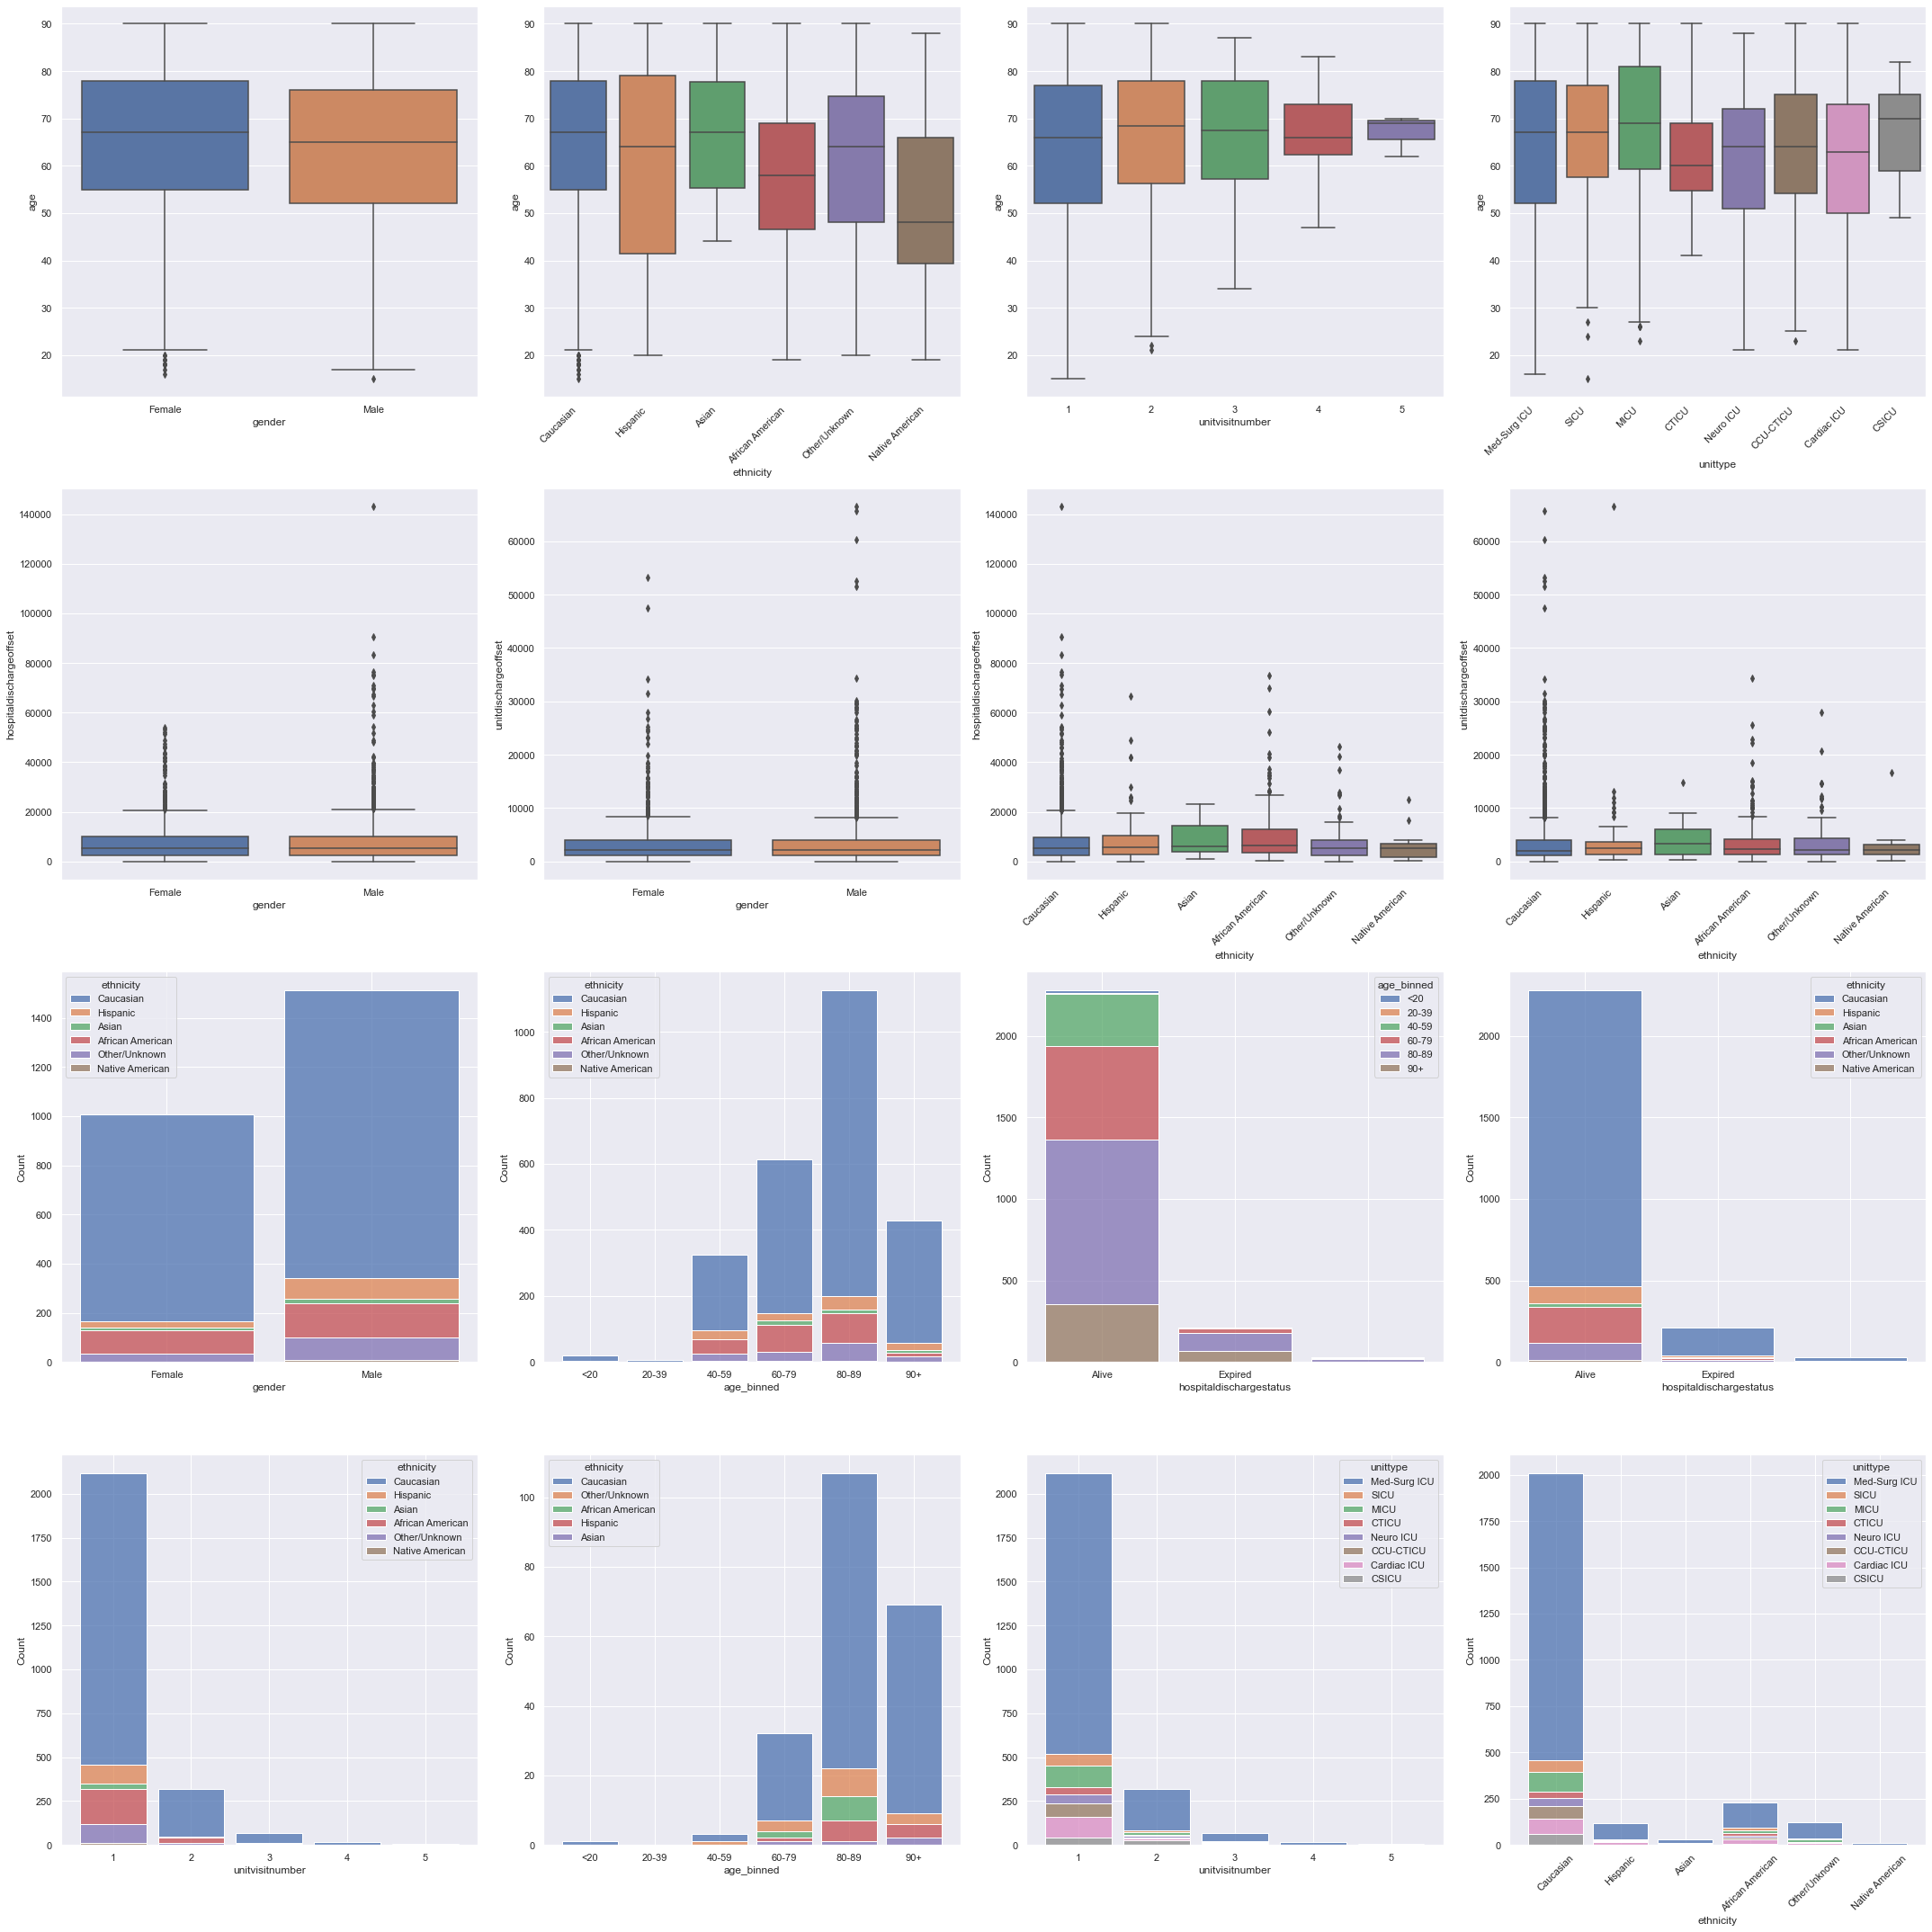

In [58]:
#create DataFrame
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region: rows, columns
fig, axes = plt.subplots(4, 4, figsize=(30, 30))

sns.boxplot(data=data_join, x='gender', y='age', ax=axes[0,0])
sns.boxplot(data=data_join, x='ethnicity', y='age', ax=axes[0,1])
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, horizontalalignment='right')
sns.boxplot(data=data_join, x='unitvisitnumber', y='age', ax=axes[0,2])
sns.boxplot(data=data_join, x='unittype', y='age', ax=axes[0,3])
axes[0,3].set_xticklabels(axes[0,3].get_xticklabels(), rotation=45, horizontalalignment='right')



sns.boxplot(data=data_join, x='gender', y='hospitaldischargeoffset', ax=axes[1,0])
sns.boxplot(data=data_join, x='gender', y='unitdischargeoffset', ax=axes[1,1])
sns.boxplot(data=data_join, x='ethnicity', y='hospitaldischargeoffset', ax=axes[1,2])
axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=45, horizontalalignment='right')
sns.boxplot(data=data_join, x='ethnicity', y='unitdischargeoffset', ax=axes[1,3])
axes[1,3].set_xticklabels(axes[1,3].get_xticklabels(), rotation=45, horizontalalignment='right')


sns.histplot(data=data_join, x="gender", shrink=.85, hue='ethnicity', ax=axes[2,0], multiple='stack')
sns.histplot(data=data_join, x="age_binned", shrink=.85, hue='ethnicity', ax=axes[2,1], multiple='stack')
sns.histplot(data=data_join, x="hospitaldischargestatus", shrink=.85, hue='age_binned', ax=axes[2,2], multiple='stack')
sns.histplot(data=data_join, x="hospitaldischargestatus", bins=22, shrink=.85, hue='ethnicity', ax=axes[2,3], multiple='stack')

sns.histplot(data=data_join, x="unitvisitnumber", bins=[1,2,3,4,5], discrete=True, hue='ethnicity', shrink=.85, ax=axes[3,0], multiple='stack')
sns.histplot(data=data_join.query('hospitaldischargestatus == "Expired"'), x="age_binned", hue='ethnicity', shrink=.85, ax=axes[3,1], multiple='stack')
sns.histplot(data=data_join, x="unitvisitnumber", bins=[1,2,3,4,5], discrete=True, hue='unittype', shrink=.85, ax=axes[3,2], multiple='stack')
sns.histplot(data=data_join, x="ethnicity", bins=[1,2,3,4,5], discrete=True, hue='unittype', shrink=.85, ax=axes[3,3], multiple='stack')
#axes[3,3].set_xticklabels(axes[3,3].get_xticklabels(), rotation=45, horizontalalignment='right')
axes[3,3].tick_params(axis="x", labelrotation=45)



plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

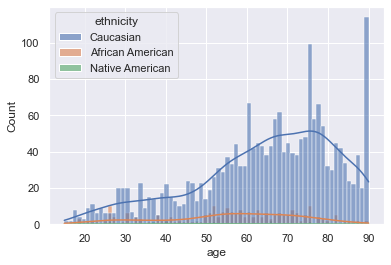

In [59]:
# want to plot unit staylength by age and by ethnicity and by unit type in kde plots
ethnicities = ['Caucasian','African American','Native American']
unittypes = ['CTICU','Cardiac ICU','CSICU']
data_3D_ethnicity = data_join[data_join['ethnicity'].isin(ethnicities)]
data_3D_unitype = data_join[data_join['unittype'].isin(unittypes)]

sns.histplot(data=data_3D_ethnicity, x='age', hue='ethnicity', bins=70, color='orange', kde=True, alpha=0.6)
plt.show

<AxesSubplot:xlabel='ethnicity', ylabel='unitdischargeoffset'>

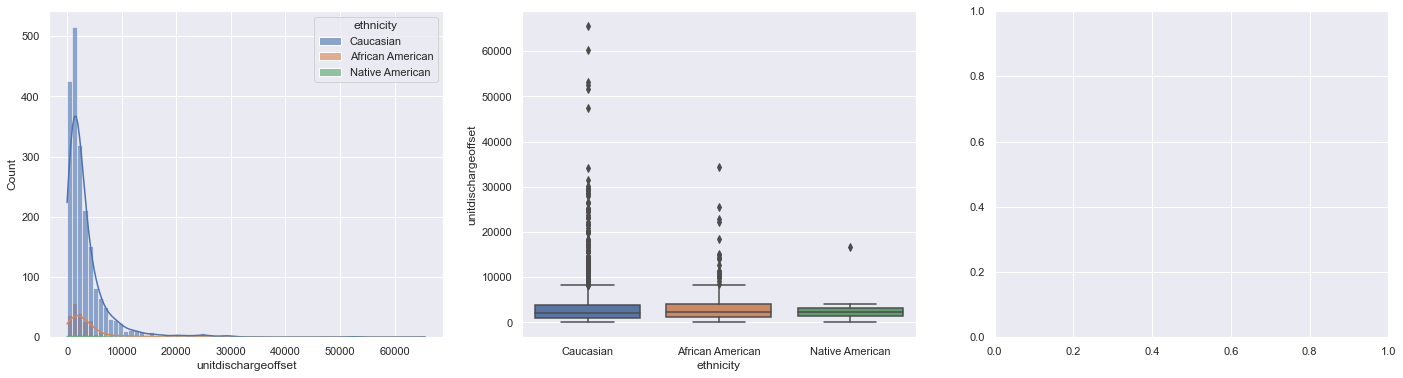

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

sns.histplot(data=data_3D_ethnicity, x='unitdischargeoffset', hue='ethnicity', bins=70, color='orange', kde=True, alpha=0.6, ax=axes[0])

sns.boxplot(data=data_3D_ethnicity, x='ethnicity', y='unitdischargeoffset', ax=axes[1])


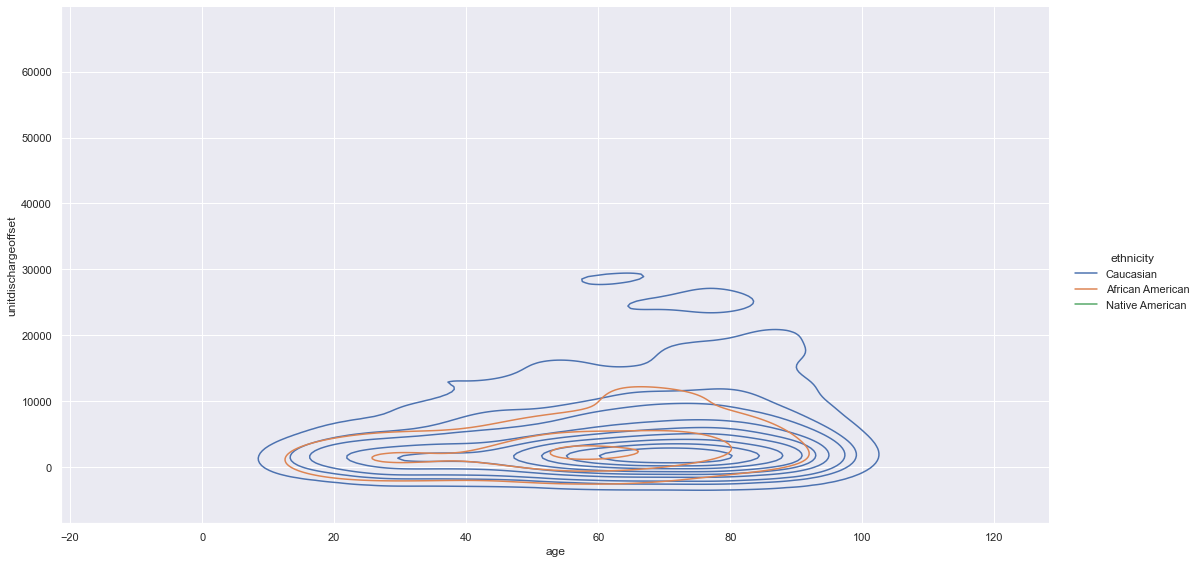

In [40]:
sns.displot(data=data_3D_ethnicity, x='age', y='unitdischargeoffset', hue='ethnicity', kind="kde",height=8, aspect=15/8)

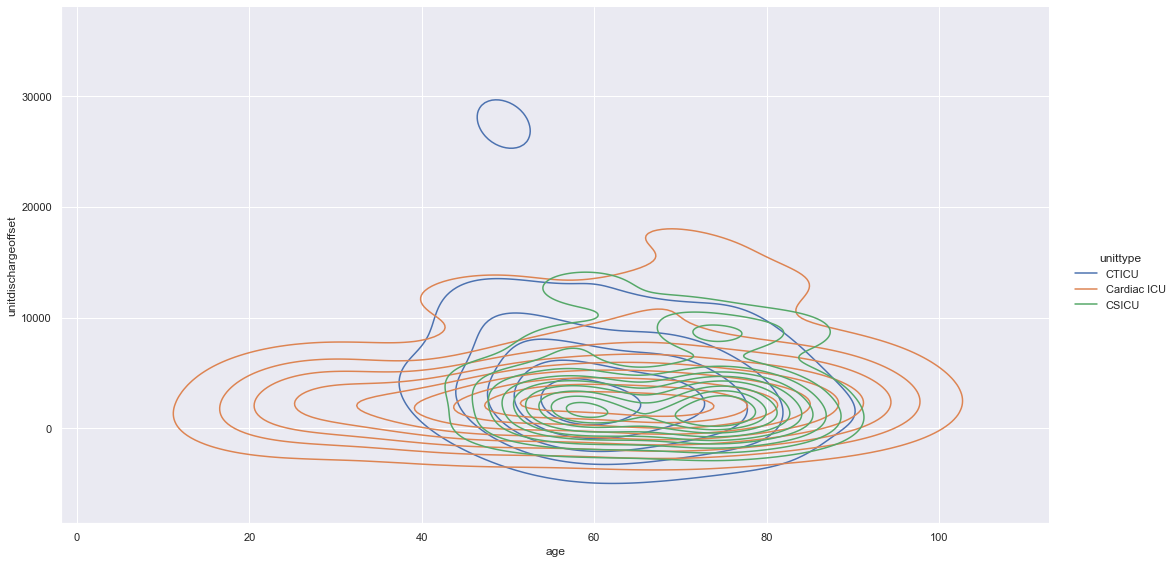

In [41]:
sns.displot(data=data_3D_unitype, x='age', y='unitdischargeoffset', hue='unittype', kind="kde",height=8, aspect=15/8)

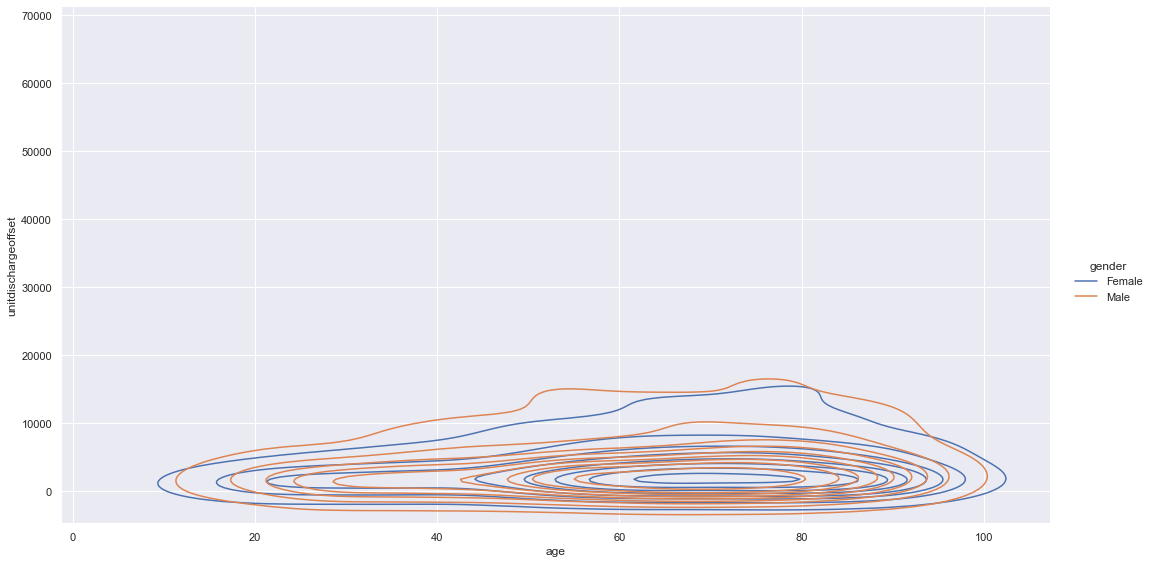

In [42]:
sns.displot(data=data_join, x='age', y='unitdischargeoffset', hue='gender', kind="kde",height=8, aspect=15/8)

## Joining top 10 past histories to the patient data to see whether this is useful for different distributions in the Gan

In [43]:
df_top10_history = data_hist_top.set_index('patientunitstayid')
data_join_top10 = data_patients.join(df_top10_history, how="inner")
# reset index to get patient unit stay id out of the index
data_join_top10 = data_join_top10.reset_index()
print(data_join_top10.shape)
data_join_top10.head(5)

(4431, 37)


,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,age_binned,pasthistoryid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvalue,pasthistoryvaluetext
0,147784,134042,Female,60.0,Hispanic,67,109,Coma/change in level of consciousness (for hep...,154.9,05:06:00,0,,2015,23:08:00,3962,Home,Alive,Med-Surg ICU,05:06:00,Emergency Department,1,admit,95.6,97.6,20:47:00,2381,Floor,Alive,002-10424,60-79,1261967,10,20,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,medication dependent,medication dependent
1,153972,138861,Male,63.0,Caucasian,59,91,"Bleeding, lower GI",172.7,16:43:00,-36,Emergency Department,2014,19:51:00,1592,Home,Alive,Med-Surg ICU,17:19:00,Emergency Department,1,admit,,101.4,19:04:00,1545,Home,Alive,002-11007,80-89,910698,-1,13,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,atrial fibrillation - chronic,atrial fibrillation - chronic
2,153972,138861,Male,63.0,Caucasian,59,91,"Bleeding, lower GI",172.7,16:43:00,-36,Emergency Department,2014,19:51:00,1592,Home,Alive,Med-Surg ICU,17:19:00,Emergency Department,1,admit,,101.4,19:04:00,1545,Home,Alive,002-11007,80-89,910695,-1,13,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment
3,153972,138861,Male,63.0,Caucasian,59,91,"Bleeding, lower GI",172.7,16:43:00,-36,Emergency Department,2014,19:51:00,1592,Home,Alive,Med-Surg ICU,17:19:00,Emergency Department,1,admit,,101.4,19:04:00,1545,Home,Alive,002-11007,80-89,910693,-1,13,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,MI - date unknown,MI - date unknown
4,155961,140376,Female,57.0,Caucasian,56,82,"Knee replacement, total (non-traumatic)",157.5,17:40:00,-8,Operating Room,2014,18:38:00,4370,Home,Alive,Med-Surg ICU,17:48:00,Operating Room,1,admit,120.1,123.4,18:39:00,1491,Floor,Alive,002-10122,60-79,963403,-2,4,Comprehensive Progress,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment


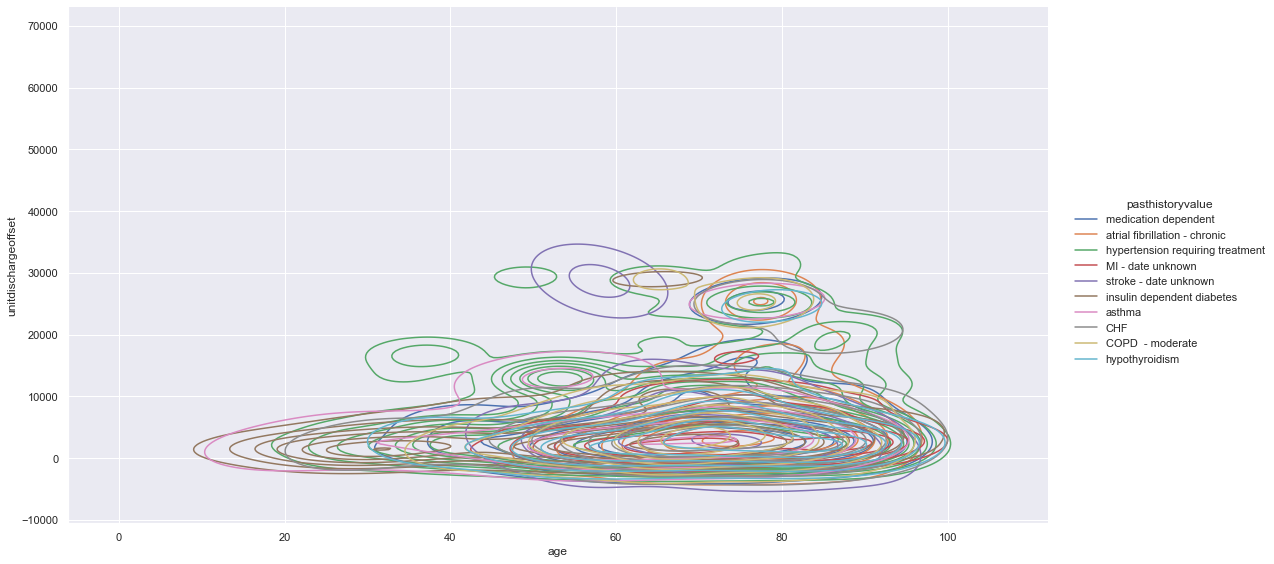

In [44]:
sns.displot(data=data_join_top10, x='age', y='unitdischargeoffset', hue='pasthistoryvalue', kind="kde",height=8, aspect=15/8)




(2537, 37)


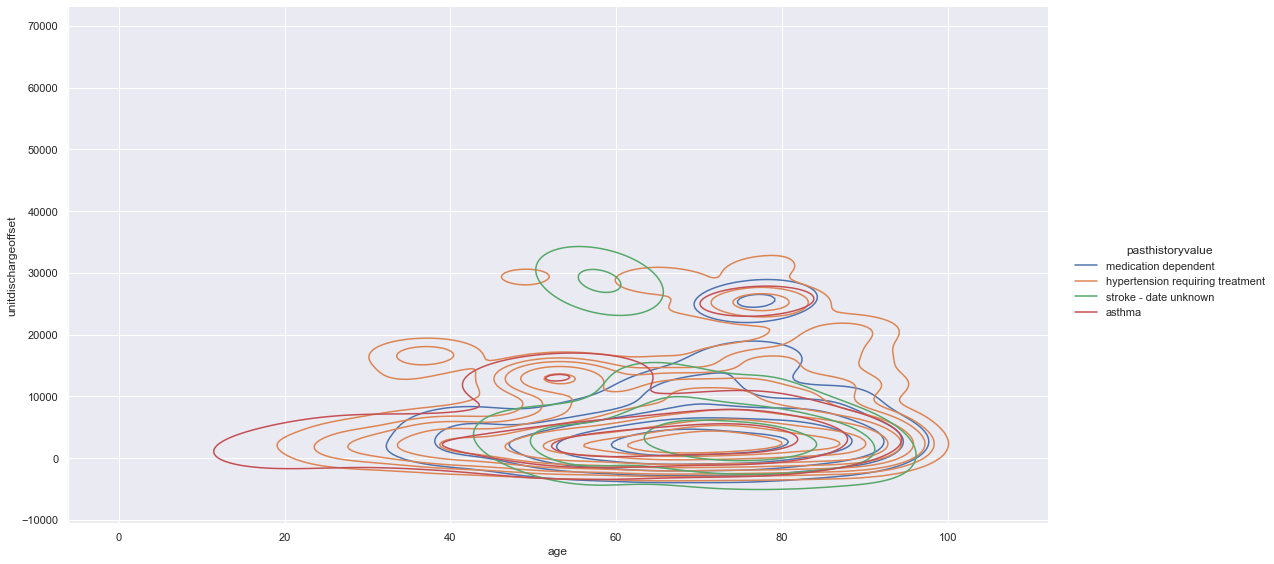

In [45]:
# try filtering on past history values medication dependent, hypertension requiring treatment, COPD - moderate, stroke - date unknown, asthma
pasthistories = ['medication dependent','hypertension requiring treatment','COPD - moderate','stroke - date unknown','asthma']
data_3D_pasthistories = data_join_top10[data_join_top10['pasthistoryvalue'].isin(pasthistories)]
print(data_3D_pasthistories.shape)

sns.displot(data=data_3D_pasthistories, x='age', y='unitdischargeoffset', hue='pasthistoryvalue', kind="kde",height=8, aspect=15/8)

In [50]:
data_3D_pasthistories.groupby(['pasthistoryvalue']).count()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,age_binned,pasthistoryid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvaluetext
pasthistoryvalue,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
asthma,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
hypertension requiring treatment,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746
medication dependent,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397
stroke - date unknown,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189


In [51]:
import os
os.getcwd()

'c:\\Users\\dianam\\Documents\\jlab_datascience\\PlayGround\\DS6050\\eICU_gan\\gan_work'

In [48]:
data_3D_pasthistories.to_csv('../data/data_3D_pasthistories.csv')

In [52]:
import sys
sys.path.insert(0,'..')

from dataprep import create_eICU_data
os.getcwd()



'c:\\Users\\dianam\\Documents\\jlab_datascience\\PlayGround\\DS6050\\eICU_gan\\gan_work'

In [54]:
npy_ph = create_eICU_data.create_eICU_Age_PastHistory_UnitStayLength_npy(eICU_df_filename='../data/data_3D_pasthistories.csv', save_filename='../data/data_age_unitdischargeoffset_pasthistories.csv', pasthistories=pasthistories)

In [62]:
df_3D = pd.read_csv('../data/data_3D_pasthistories.csv')[['patientunitstayid','age','unitdischargeoffset','pasthistoryvalue']]
df_3D.drop_duplicates(inplace=True)
df_3D = pd.crosstab([df_3D.patientunitstayid, df_3D.age, df_3D.unitdischargeoffset], df_3D.pasthistoryvalue, margins=True)
df_3D.reset_index(inplace=True)
#df_3D = df_3D[['patientunitstayid','age','unitdischargeoffset','asthma','hypertension requiring treatment','medication dependent','stroke - date unknown','All']]
df_3D = df_3D[['age','unitdischargeoffset','asthma','hypertension requiring treatment','medication dependent','stroke - date unknown','All']]
df_3D.reset_index(drop=True, inplace=True)
print(df_3D.shape)
df_3D.to_csv('../data/data_3D_pasthistories_onehot.csv')




(1303, 7)


In [63]:
df_new_3D = pd.read_csv('../data/data_3D_pasthistories_onehot.csv')
df_new_3D.head()

,age,unitdischargeoffset,asthma,hypertension_req_treatment,med_dependent,stroke_date_unknown,count_ph
0,60,2381,0,0,1,0,1
1,63,1545,0,1,0,0,1
2,57,1491,0,1,0,0,1
3,87,3583,0,0,1,1,2
4,71,1241,0,0,1,0,1


<AxesSubplot:xlabel='count_ph', ylabel='unitdischargeoffset'>

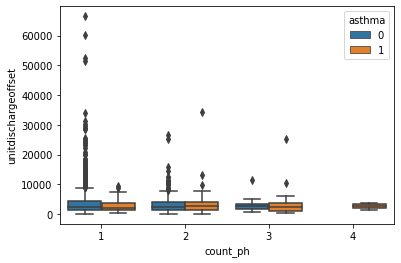

In [69]:
sns.boxplot(data=df_new_3D, x='count_ph', y='unitdischargeoffset', hue='asthma')

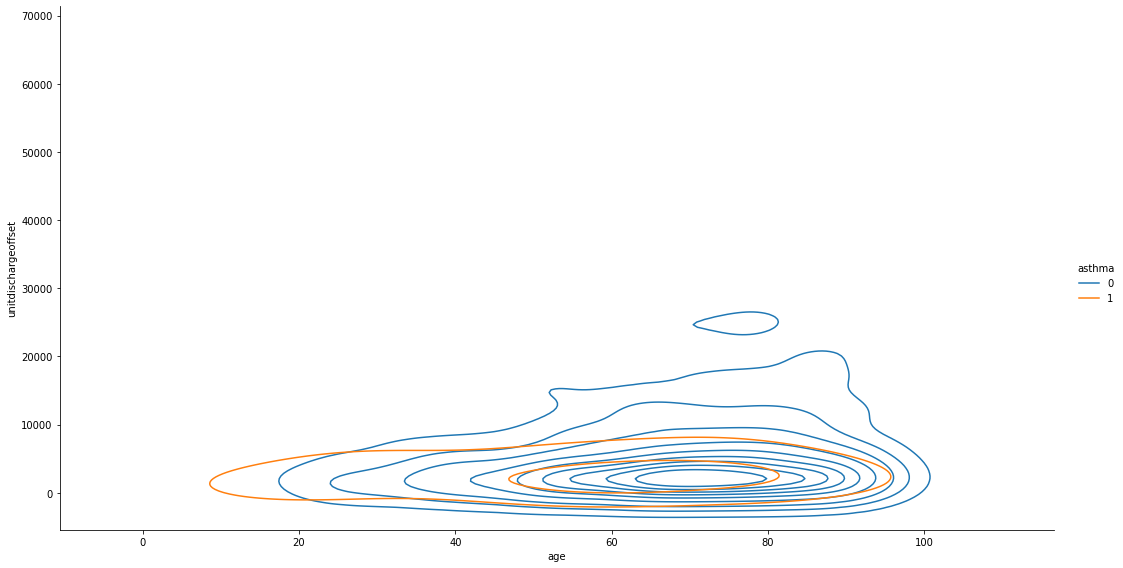

In [77]:
sns.displot(data=df_new_3D, x='age', y='unitdischargeoffset', hue='asthma', kind="kde",height=8, aspect=15/8)

In [82]:
print(124/len(df_new_3D))
df_new_3D.groupby(['asthma']).count()

,age,unitdischargeoffset,hypertension_req_treatment,med_dependent,stroke_date_unknown,count_ph
asthma,,,,,,
0,1178,1178,1178,1178,1178,1178
1,124,124,124,124,124,124


In [95]:
print(129/len(df_new_3D))
df_new_3D.groupby(['stroke_date_unknown']).count()

,age,unitdischargeoffset,asthma,hypertension_req_treatment,med_dependent,count_ph
stroke_date_unknown,,,,,,
0,1173,1173,1173,1173,1173,1173
1,129,129,129,129,129,129


In [94]:
print(270/len(df_new_3D))
df_new_3D.groupby(['med_dependent']).count()

,age,unitdischargeoffset,asthma,hypertension_req_treatment,stroke_date_unknown,count_ph
med_dependent,,,,,,
0,1032,1032,1032,1032,1032,1032
1,270,270,270,270,270,270


In [104]:
print(1147/len(df_new_3D))
df_new_3D.groupby(['hypertension_req_treatment']).count()

0.8809523809523809


,age,unitdischargeoffset,asthma,med_dependent,stroke_date_unknown,count_ph
hypertension_req_treatment,,,,,,
0,155,155,155,155,155,155
1,1147,1147,1147,1147,1147,1147


In [185]:
# see what the accuracy of predicting asthma is using age, unitdischargeoffset, count_ph, stroke_dateunknown, medication_dependent, and hypertension_requiring_treatment
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
y_asthma = df_new_3D[['asthma']]
X_asthma = df_new_3D.drop(['asthma', 'count_ph'], axis=1)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_asthma, y_asthma, test_size=0.25, random_state=314)

clf_astham = LogisticRegressionCV(cv=10,random_state=314).fit(X_train_a, y_train_a)
y_hat_a = clf_astham.predict(X_test_a)
print(clf_astham.score(X_test_a, y_test_a))

confusion_matrix(y_test_a, y_hat_a)

NameError: name 'df_new_3D' is not defined

In [162]:
# see what the accuracy of predicting stroke is using age, unitdischargeoffset, count_ph, asthama, medication_dependent, and hypertension_requiring_treatment
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
y_stroke= df_new_3D[['stroke_date_unknown']]
X_stroke = df_new_3D.drop(['stroke_date_unknown', 'count_ph'], axis=1)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_stroke, y_stroke, test_size=0.25, random_state=314)

clf_stroke = LogisticRegressionCV(cv=10,random_state=314).fit(X_train_s, y_train_s)
y_hat_s = clf_stroke.predict(X_test_s)
print(clf_stroke.score(X_test_s, y_test_s))
confusion_matrix(y_test_s, y_hat_s)

0.9079754601226994


array([[296,   0],
       [ 30,   0]], dtype=int64)

In [161]:
# see what the accuracy of predicting medication_dependent is using age, unitdischargeoffset, count_ph, asthama, stroke, and hypertension_requiring_treatment
y_med= df_new_3D[['med_dependent']]
X_med = df_new_3D.drop(['med_dependent', 'count_ph'], axis=1)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_med, y_med, test_size=0.3, random_state=314)

clf_med = LogisticRegressionCV(cv=10,random_state=314).fit(X_train_m, y_train_m)
y_hat_m = clf_med.predict(X_test_m)
print(clf_med.score(X_test_m, y_test_m))
confusion_matrix(y_test_m, y_hat_m)

0.8132992327365729


array([[300,   6],
       [ 67,  18]], dtype=int64)

In [158]:
# see what the accuracy of predicting hypertension_req_treatment is using age, unitdischargeoffset, count_ph, asthama, stroke, and med_dependent

y_h= df_new_3D[['hypertension_req_treatment']]
X_h = df_new_3D.drop(['hypertension_req_treatment', 'count_ph'], axis=1)

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=.3, random_state=314)

clf_h = LogisticRegressionCV(cv=10,random_state=314).fit(X_train_h, y_train_h)
y_hat_h = clf_h.predict(X_test_h)
print(clf_h.score(X_test_h, y_test_h))
confusion_matrix(y_test_h, y_hat_h)

0.887468030690537


array([[ 12,  37],
       [  7, 335]], dtype=int64)

# Ideas for tabular data

Each row represents a **Patient Stay**:
* we have patients, with their on hot encoded past history

In [34]:
print(data_join.shape)
data_join.head()

(2520, 50)


,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,age_binned,CHF,COPD - moderate,MI - within 6 months,MR,No Health Problems,Not Obtainable,Performed,ascites,asthma,atrial fibrillation - chronic,head and neck,hypertension requiring treatment,hypothyroidism,insulin dependent diabetes,medication dependent,neuromuscular disease,primary site,renal insufficiency - creatinine 2-3,restrictive pulmonary disease,s/p AVR
0,141764,129391,Female,87.0,Caucasian,59,91,,157.5,23:36:00,-2258,,2015,19:20:00,366,Home,Alive,Med-Surg ICU,13:14:00,ICU to SDU,2,stepdown/other,,,18:58:00,344,Home,Alive,002-1039,90+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,141765,129391,Female,87.0,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",157.5,23:36:00,-8,,2015,19:20:00,2616,Home,Alive,Med-Surg ICU,23:44:00,Emergency Department,1,admit,46.5,45,13:14:00,2250,Step-Down Unit (SDU),Alive,002-1039,90+,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,143870,131022,Male,76.0,Caucasian,68,103,"Endarterectomy, carotid",167,20:46:00,-1,Operating Room,2014,17:05:00,1218,Home,Alive,SICU,20:47:00,Operating Room,1,admit,77.5,79.4,10:00:00,793,Floor,Alive,002-12289,80-89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,144815,131736,Female,34.0,Caucasian,56,82,"Overdose, other toxin, poison or drug",172.7,01:44:00,-23,Emergency Department,2015,21:05:00,1138,Other Hospital,Alive,Med-Surg ICU,02:07:00,Emergency Department,1,admit,60.3,60.7,20:48:00,1121,Other External,Alive,002-1116,40-59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,145427,132209,Male,61.0,Caucasian,68,103,"GI perforation/rupture, surgery for",177.8,23:48:00,-10,Emergency Department,2014,15:41:00,5263,Home,Alive,SICU,23:58:00,Operating Room,1,admit,91.7,93.1,22:47:00,1369,Floor,Alive,002-12243,80-89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
data_join.tail()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,age_binned,CHF,COPD - moderate,MI - within 6 months,MR,No Health Problems,Not Obtainable,Performed,ascites,asthma,atrial fibrillation - chronic,head and neck,hypertension requiring treatment,hypothyroidism,insulin dependent diabetes,medication dependent,neuromuscular disease,primary site,renal insufficiency - creatinine 2-3,restrictive pulmonary disease,s/p AVR
2515,3351763,2741766,Female,62.0,Caucasian,459,1108,"Fistula/abscess, surgery for (not inflammatory...",165.1,16:08:00,-68242,Operating Room,2014,16:24:00,36894,Home,Alive,Med-Surg ICU,01:30:00,Operating Room,1,admit,134.5,133.3,19:24:00,5394,Step-Down Unit (SDU),Alive,035-10391,80-89,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2516,3352230,2742186,Male,41.0,African American,458,1107,"CABG alone, coronary artery bypass grafting",177.8,21:21:00,-1512,Direct Admit,2014,18:35:00,18482,Home,Alive,CTICU,22:33:00,Operating Room,2,transfer,127,128.5,21:34:00,4261,Telemetry,Alive,035-10089,60-79,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2517,3352231,2742186,Male,41.0,African American,458,1104,"Infarction, acute myocardial (MI)",177.8,21:21:00,-136,Direct Admit,2014,18:35:00,19858,Home,Alive,Cardiac ICU,23:37:00,Direct Admit,1,admit,127,135.2,22:26:00,1369,Other ICU,Alive,035-10089,60-79,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2518,3352333,2742269,Male,72.0,Caucasian,458,1111,GI obstruction,177.8,20:00:00,0,Other Hospital,2014,16:59:00,5579,,Alive,SICU,20:00:00,Other Hospital,1,admit,68.3,66.5,17:26:00,4166,Floor,Alive,035-10041,80-89,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2519,3353113,2742979,Male,50.0,Caucasian,459,1108,Drug withdrawal,188,17:33:00,-1698,Floor,2014,01:01:00,4510,Home,Alive,Med-Surg ICU,21:51:00,Floor,1,admit,88,83.9,18:45:00,2694,Telemetry,Alive,035-10030,60-79,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
data_join['MR'].sum()

25.0

In [37]:
# save data_join to csv for use for use in a GAN
#data_join.to_csv('../data/eICU/patients_top10_50-59_pasthist.csv', index=False)
data_for_gan = data_join.drop(['patientunitstayid','patienthealthsystemstayid'], axis=1)
#data_for_gan.to_csv('../data/eICU/patients_pasthist_forgan.csv', index=False)

In [38]:
conn_eICU.close()

## Create One and Two Dimensional numpy arrays for simple GAN generation

1. age
1. age and unit type
    * only for:
        * CT ICU, 
        * Cardiac ICU 
        * CSI ICU)
1. age and ethnicity
    * only for:
        * Caucasian
        * African American
        * Native American


In [126]:
import sys
sys.path.insert(0,'..')

from dataprep import create_eICU_data

In [139]:
np_age = create_eICU_data.create_eICU_Age_npy(save_filename = '../data/eICU/eICU_age.npy')
print(len(np_age))
print(np_age[0:5])
np_age_from_file = np.load('../data/eICU/eICU_age.npy')
print(len(np_age_from_file))
print(np_age_from_file[0:5])

2520
[(87,) (87,) (76,) (34,) (61,)]
2520
[(87,) (87,) (76,) (34,) (61,)]


In [141]:
np_age_unittype = create_eICU_data.create_eICU_Age_Unittype_npy(save_filename='../data/eICU/eICU_age_unittype.npy', unittypes=['CTICU','Cardiac ICU','CSICU'])
print(len(np_age_unittype))
print(np_age_unittype[0:5])
np_age_unittype_from_file = np.load('../data/eICU/eICU_age_unittype.npy', allow_pickle=True)
print(len(np_age_unittype_from_file))
print(np_age_unittype_from_file[0:5])

250
[[(59,) ('CTICU',)]
 [(55,) ('CTICU',)]
 [(72,) ('Cardiac ICU',)]
 [(49,) ('CTICU',)]
 [(49,) ('CTICU',)]]
250
[[(59,) ('CTICU',)]
 [(55,) ('CTICU',)]
 [(72,) ('Cardiac ICU',)]
 [(49,) ('CTICU',)]
 [(49,) ('CTICU',)]]


In [142]:
np_age_ethnicity= create_eICU_data.create_eICU_Age_Ethnicity_npy(save_filename = '../data/eICU/eICU_age_ethnicity.npy', ethnicities=['Caucasian','African American','Native American'])
print(len(np_age_ethnicity))
print(np_age_ethnicity[0:5])
np_age_ethnicity_from_file = np.load('../data/eICU/eICU_age_ethnicity.npy', allow_pickle=True)
print(len(np_age_ethnicity_from_file))
print(np_age_ethnicity_from_file[0:5])

2253
[[(87,) ('Caucasian',)]
 [(87,) ('Caucasian',)]
 [(76,) ('Caucasian',)]
 [(34,) ('Caucasian',)]
 [(61,) ('Caucasian',)]]
2253
[[(87,) ('Caucasian',)]
 [(87,) ('Caucasian',)]
 [(76,) ('Caucasian',)]
 [(34,) ('Caucasian',)]
 [(61,) ('Caucasian',)]]


# Section starting with ALL past histories and joining to patient table

In [208]:

df_ph = data_hist_filter.set_index('patientunitstayid')
data_ph_patients = data_patients.join(df_ph, how="inner")
# reset index to get patient unit stay id out of the index
data_jodata_ph_patientsin_top10 = data_ph_patients.reset_index()
print(data_ph_patients.shape)
data_ph_patients.reset_index(inplace=True)
data_ph_patients.head(2)


(9111, 36)


,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,age_binned,pasthistoryid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvalue,pasthistoryvaluetext
0,141765,129391,Female,87.0,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",157.5,23:36:00,-8,,2015,19:20:00,2616,Home,Alive,Med-Surg ICU,23:44:00,Emergency Department,1,admit,46.5,45,13:14:00,2250,Step-Down Unit (SDU),Alive,002-1039,90+,990803,7,12,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems
1,143870,131022,Male,76.0,Caucasian,68,103,"Endarterectomy, carotid",167,20:46:00,-1,Operating Room,2014,17:05:00,1218,Home,Alive,SICU,20:47:00,Operating Room,1,admit,77.5,79.4,10:00:00,793,Floor,Alive,002-12289,80-89,970059,4,10,Comprehensive Progress,notes/Progress Notes/Past History/Past History...,No Health Problems,NoHealthProblems


In [209]:
# save the join of a patient unit stay record with all past history records (that do not include the 'Performed' past histories we don't care about)
data_ph_patients.to_csv('../data/patients_pasthistory.csv', index=False)

In [218]:
df = pd.read_csv('../data/patients_pasthistory.csv')[['patientunitstayid','age','unitdischargeoffset','hospitaldischargeoffset','hospitaldischargestatus','gender','ethnicity','pasthistoryvalue']]

df.drop_duplicates(inplace=True)
df = pd.crosstab([df.patientunitstayid, df.age, df.unitdischargeoffset,df.hospitaldischargeoffset,df.hospitaldischargestatus,df.gender,df.ethnicity], df.pasthistoryvalue, margins=True)
df.reset_index(inplace=True)
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)
print(df.shape)
df.to_csv('../data/patients_allpasthistory_onehot.csv')

(2028, 181)


In [219]:
df = pd.get_dummies(df, columns=["ethnicity",'gender','hospitaldischargestatus'], prefix=["ethnicity",'gender','dischargestatus'] )
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('-', '_')

#drop the df row with NoHealthProblems == 179 - this is the sum row which we want to drop
df = df[df['NoHealthProblems'] != 179]
  

#in All column, subtract value of NoHealthProblems column
df['All'] = [a-nhp for a,nhp in zip(df['All'],df['NoHealthProblems'])]

In [220]:
# add the no health problems column
df.to_csv('../data/patients_allpasthistory_onehot.csv')
#df.head()

df.groupby(['NoHealthProblems']).size()

NoHealthProblems
0    1848
1     179
dtype: int64

In [221]:
#df = df.drop([1854])
df.to_csv('../data/patients_allpasthistory_onehot.csv')
#df.head()
df = pd.read_csv('../data/patients_allpasthistory_onehot.csv')
#df.loc[df['asthma'] == 98]

## Possibilities:
1. COPD and heart related:
    1. COPD_nolimitations
    2. COPD_moderate
    3. COPD_severe
    4. asthma
    5. home oxygen
    6. CHF
    7. hypertension requiring treatment
1. organs
    1. lung
    1. liver
    1. bladder*
    1. brain
    1. breast*
    1. colon*
    1. uterus

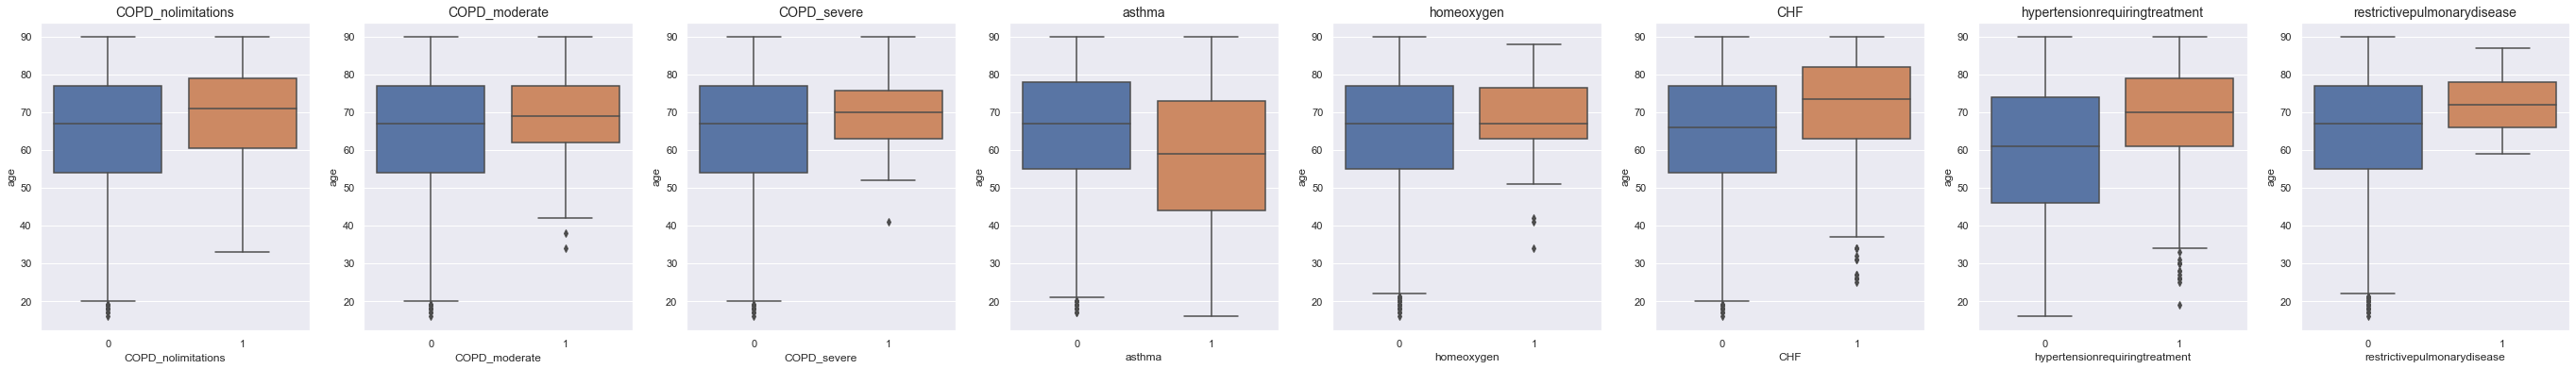

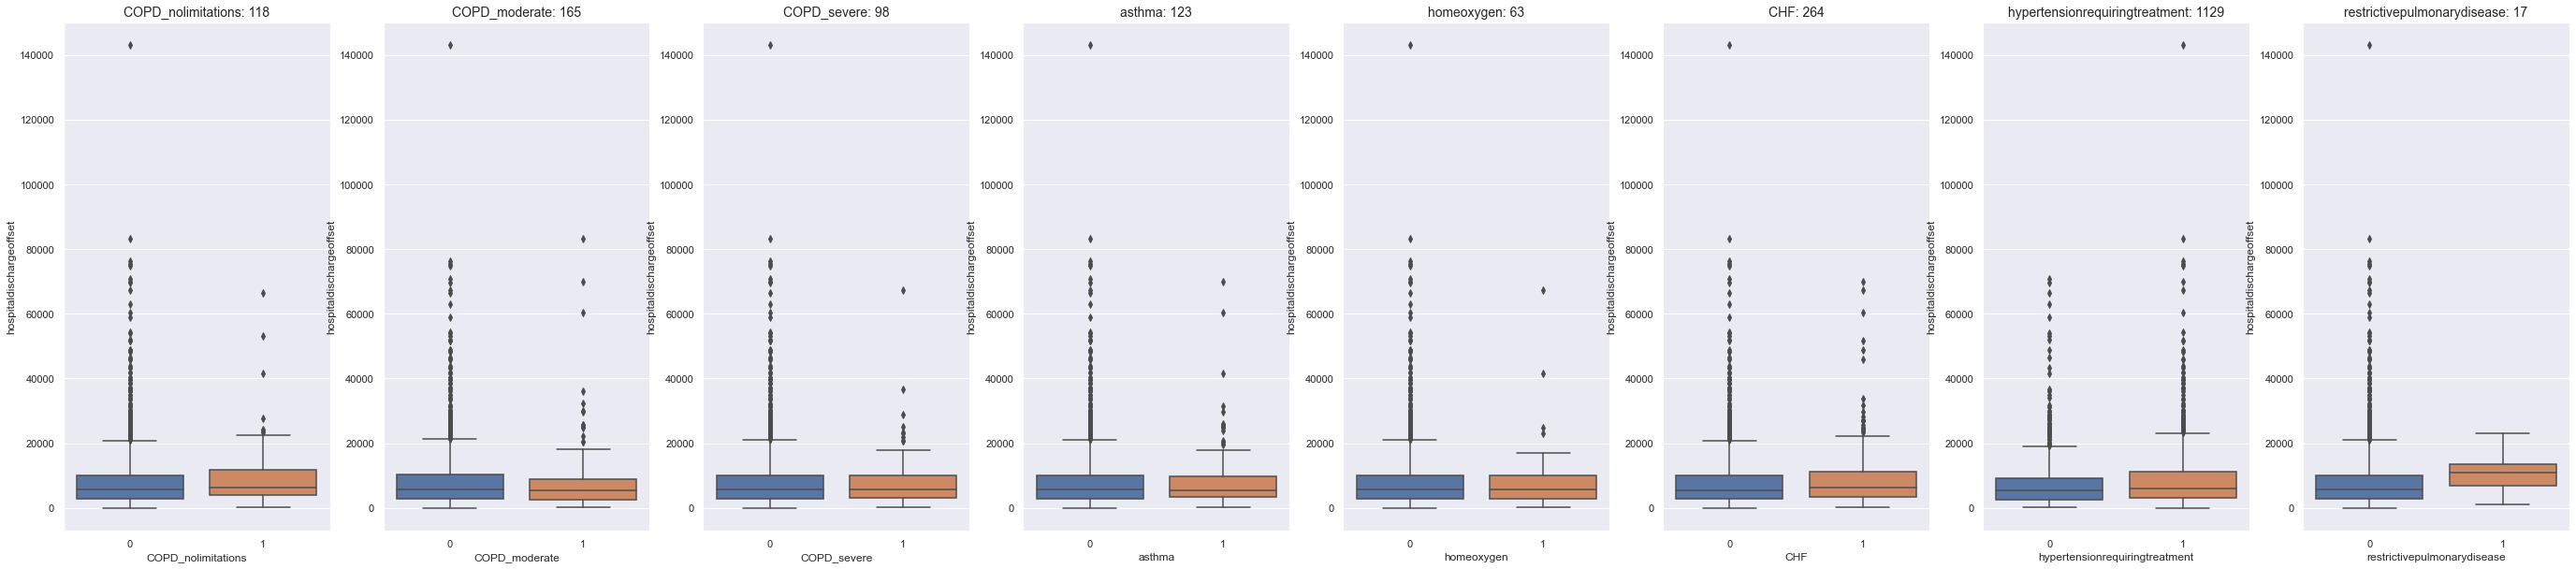

In [222]:
xs = ['COPD_nolimitations','COPD_moderate','COPD_severe','asthma','CHF','hypertensionrequiringtreatment','restrictivepulmonarydisease','NoHealthProblems']

fig, axes = plt.subplots(1, len(xs), figsize=(len(xs) * 6, 6))

for i in range(0, len(xs)):
    sns.boxplot(data=df, x=xs[i], y='age', ax=axes[i])
    axes[i].set_title(xs[i], fontsize=14)

fig, axes = plt.subplots(1, len(xs), figsize=(len(xs) * 6, 10))

for i in range(0, len(xs)):
    sns.boxplot(data=df, x=xs[i], y='hospitaldischargeoffset', ax=axes[i])
    axes[i].set_title(xs[i] + ': ' + str(df[xs[i]].sum()), fontsize=14)

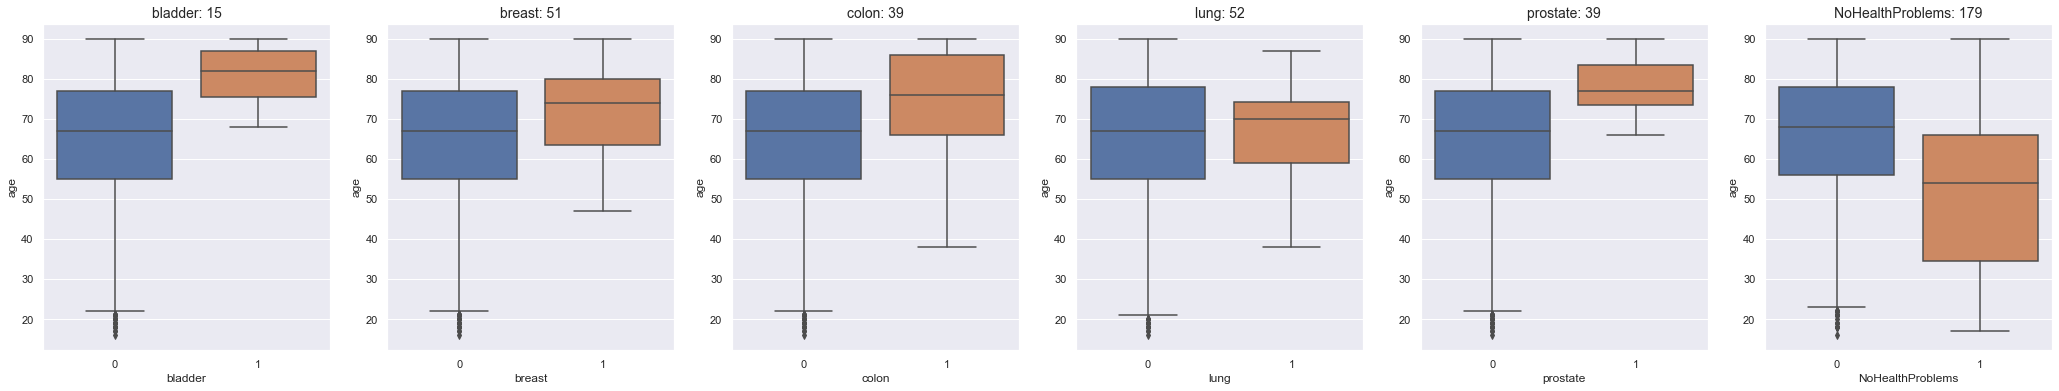

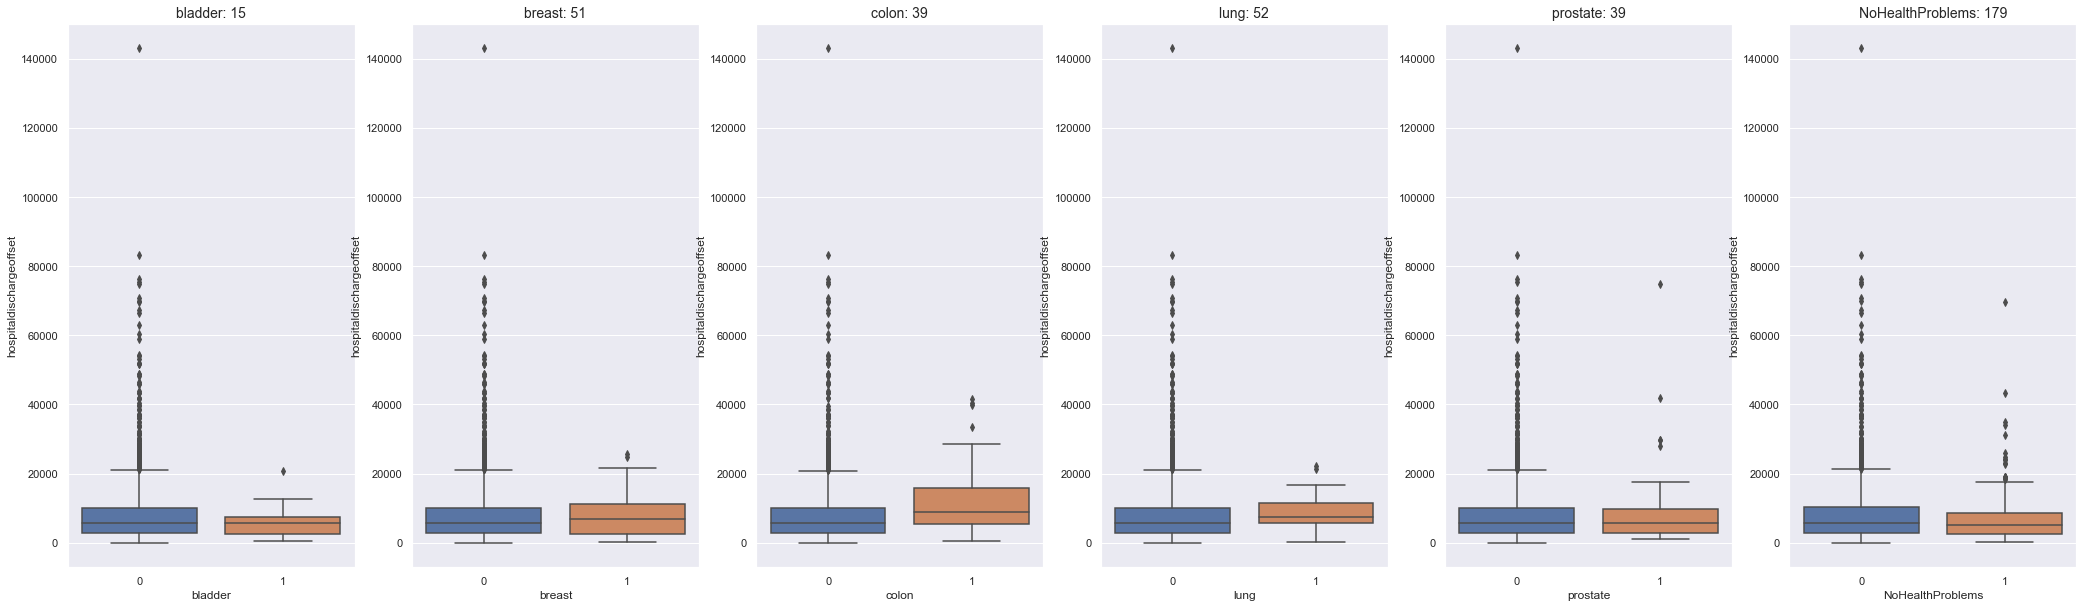

In [225]:
xs = ['bladder','breast','colon','lung','prostate','NoHealthProblems']

fig, axes = plt.subplots(1, len(xs), figsize=(len(xs) * 6, 6))

for i in range(0, len(xs)):
    sns.boxplot(data=df, x=xs[i], y='age', ax=axes[i])
    axes[i].set_title(xs[i] + ': ' + str(df[xs[i]].sum()), fontsize=14)

fig, axes = plt.subplots(1, len(xs), figsize=(len(xs) * 6, 10))

for i in range(0, len(xs)):
    sns.boxplot(data=df, x=xs[i], y='hospitaldischargeoffset', ax=axes[i])
    axes[i].set_title(xs[i] + ': ' + str(df[xs[i]].sum()), fontsize=14)

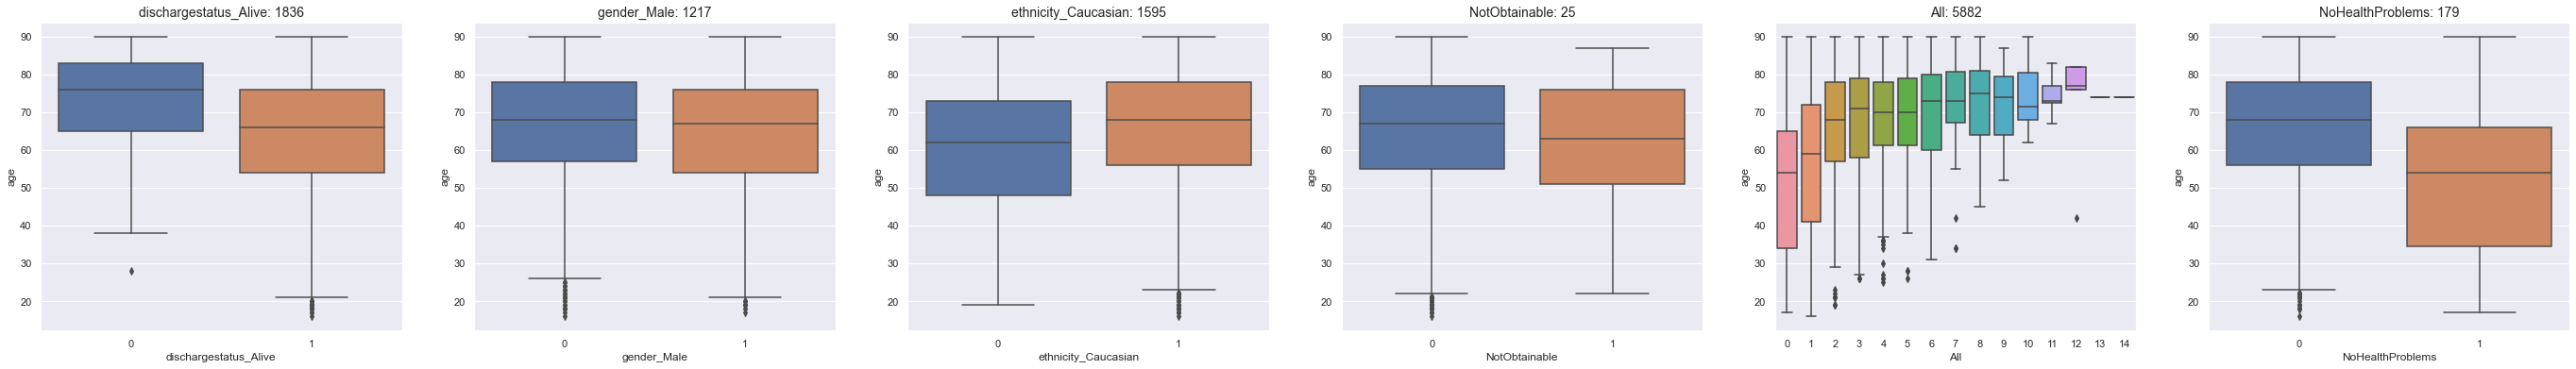

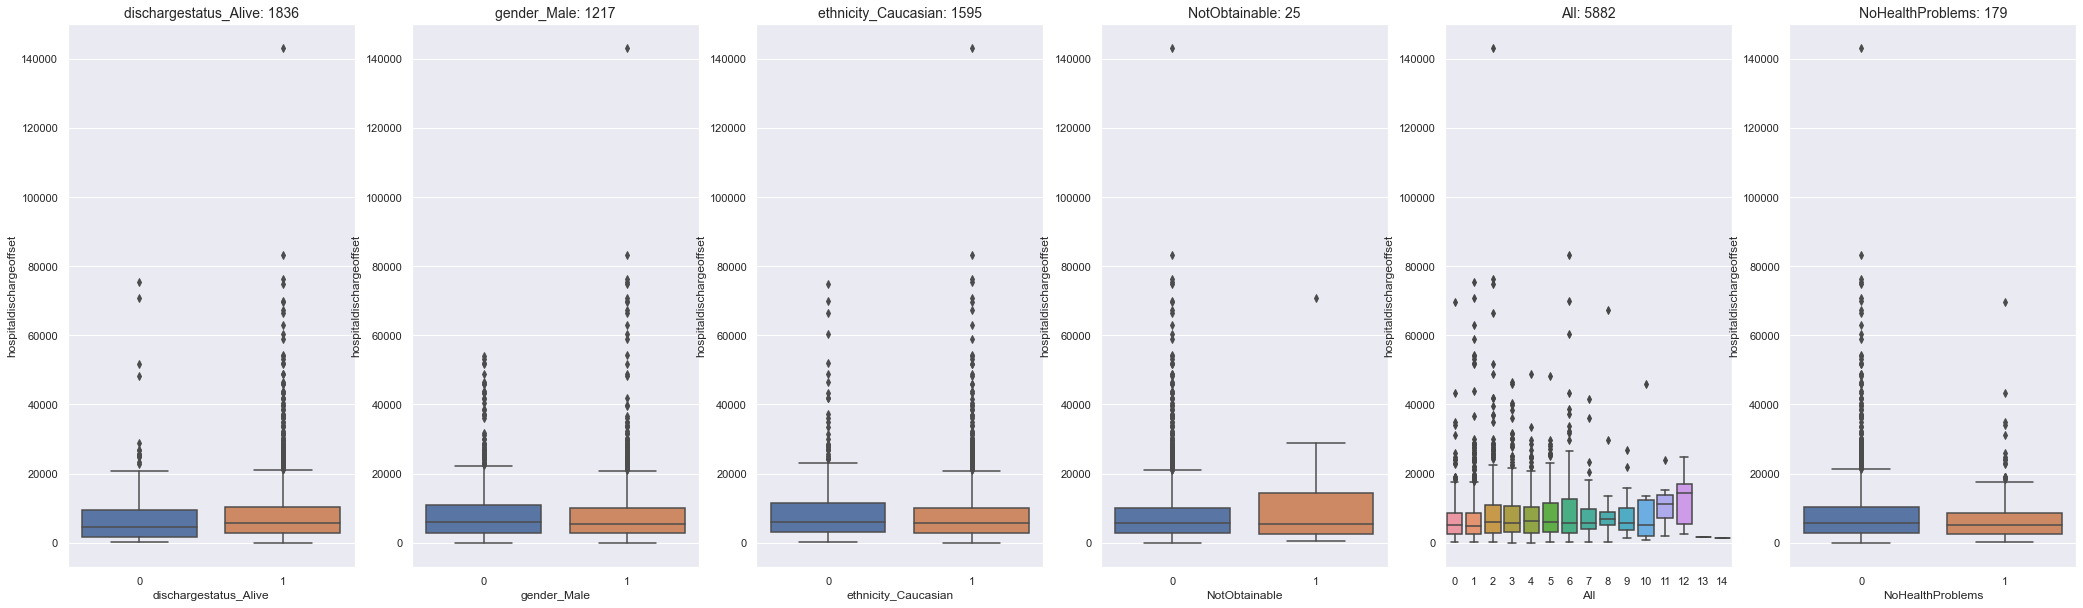

In [224]:
# All is the count of total past histories entered for the unit stay
xs = ['dischargestatus_Alive','gender_Male','ethnicity_Caucasian','NotObtainable','All','NoHealthProblems']

fig, axes = plt.subplots(1, len(xs), figsize=(len(xs) * 8, 6))

for i in range(0, len(xs)):
    sns.boxplot(data=df, x=xs[i], y='age', ax=axes[i])
    axes[i].set_title(xs[i] + ': ' + str(df[xs[i]].sum()), fontsize=14)

fig, axes = plt.subplots(1, len(xs), figsize=(len(xs) * 6, 10))

for i in range(0, len(xs)):
    sns.boxplot(data=df, x=xs[i], y='hospitaldischargeoffset', ax=axes[i])
    axes[i].set_title(xs[i] + ': ' + str(df[xs[i]].sum()), fontsize=14)